# Header

In [1]:
from utils import *
import pyreadr
from sklearn.neighbors import NearestCentroid
from scipy.stats import zscore
from statannotations.Annotator import Annotator

import puree

def join_with_linebreaks(words):
    modified_words = [word if i%3 != 0 and (i<len(words)-1) else word + '\n' for i, word in enumerate(words)]
    
#     modified_words = [word if i==0 else word.capitalize() for i,word in enumerate(modified_words)]
    
    return ' '.join(modified_words)

In [2]:
sns.set(style='white', font_scale=1)
plt.rcParams['figure.dpi'] = 300  # set default dpi to 300

In [3]:
import session_info

session_info.show()

# Annotation

## Classifier

Used TCGA 60g ILC classifier, to test on TCGA+ILC samples, then get results of ILC

In [4]:
genes_cls = np.loadtxt('../data/geneset/ILC_60g_classifier', dtype='object')
genes_cls

array(['ADH1B', 'ADH1C', 'ALDH1L1', 'AQP7P1', 'AQPEP', 'BBOX1',
       'C11orf92', 'C2orf40', 'CAPN6', 'CD300LG', 'CHRDL1', 'CLDN19',
       'CNTFR', 'COL17A1', 'CRYAB', 'DLK2', 'EFCAB1', 'FABP4', 'FAT2',
       'FFAR3', 'FIGF', 'G0S2', 'GFAP', 'GPX3', 'GRIA4', 'HIF3A', 'ITIH5',
       'KCNIP2', 'KLB', 'KLHL13', 'KLK5', 'KY', 'LGR6', 'LIPE',
       'LOC339524', 'LPL', 'MEOX1', 'MIA', 'NKPD1', 'PAK7', 'PCOLCE2',
       'PDE3B', 'PFKFB1', 'PI16', 'PIK3C2G', 'PLP1', 'RDH5', 'S100B',
       'SCARA5', 'SCN4A', 'SFRP1', 'SLC19A3', 'SLC27A6', 'SOX10', 'STAC2',
       'STX11', 'TMEM132C', 'TNMD', 'TNXB', 'TP63'], dtype=object)

In [5]:
result = pyreadr.read_r('../data/tcga/brcaTCGAtpm_log2_normalized.Rda') # also works for Rds, rda
print(result.keys()) 

df = result["brcaTCGAtpm_log2_primaries_unique"] # extract the pandas data frame for object df1
df.columns = [x.replace('-','.') for x in df.columns]
df

odict_keys(['brcaTCGAtpm_log2_primaries_unique'])


TCGA.A2.A0T1  TCGA.A7.A3J0  TCGA.AO.A126  TCGA.E2.A14X  \
rownames                                                              
1/2-SBSRNA4      0.971512      1.483925      1.799654      1.175543   
A1BG             2.187267      4.692154      5.270712      2.052527   
A1BG-AS1         1.088305      2.239740      1.339469      1.477005   
A1CF             0.012056      0.000000      0.042037      0.068496   
A2LD1            2.474746      2.847702      2.701373      2.863486   
...                   ...           ...           ...           ...   
ZYG11B           3.569481      3.727197      3.341315      4.299792   
ZYX              8.516777      7.259183      7.997580      7.836314   
ZZEF1            3.712430      4.830454      2.784098      4.111526   
ZZZ3             3.739425      4.584542      4.634273      5.517280   
tAKR             0.156369      0.155734      0.119598      0.207611   

             TCGA.A7.A13G  TCGA.AR.A0TP  TCGA.E2.A15S  TCGA.A2.A1FW  \
rownames                                                              
1/2-SBSRNA4      1.727316      1.694600      1.913264      1.715662   
A1BG             2.347300      3.687565      3.976585      1.178059   
A1BG-AS1         1.446537      1.641211      1.653995      0.896992   
A1CF             0.423666      0.020984      0.018107      0.071041   
A2LD1            1.815953      2.489747      1.593369      1.737514   
...                   ...           ...           ...           ...   
ZYG11B           4.934392      4.326777      4.513893      4.915622   
ZYX              3.388212      9.333544      5.936066      6.293990   
ZZEF1            4.608983      3.294119      4.433078      4.788771   
ZZZ3             6.153141      5.297698      8.000229      5.931909   
tAKR             0.217822      0.262879      0.000000      0.000000   

             TCGA.HN.A2OB  TCGA.B6.A0I1  ...  TCGA.A2.A0YJ  TCGA.A2.A0T4  \
rownames                                 ...                               
1/2-SBSRNA4      1.683864      1.990262  ...      0.818318      1.041237   
A1BG             4.388214      1.867174  ...      2.136823      4.230601   
A1BG-AS1         2.034332      0.930462  ...      1.105274      1.564294   
A1CF             0.000000      0.123313  ...      0.000000      0.008989   
A2LD1            2.700987      1.307890  ...      1.954546      2.658488   
...                   ...           ...  ...           ...           ...   
ZYG11B           4.164197      3.951605  ...      4.218607      3.638686   
ZYX              8.366593      7.344869  ...      7.734706      7.465227   
ZZEF1            4.115028      3.065764  ...      4.487703      3.285337   
ZZZ3             4.942152      3.852320  ...      4.948895      4.316857   
tAKR             0.061170      0.408975  ...      0.291733      0.118049   

             TCGA.AR.A1AH  TCGA.E9.A1RG  TCGA.GM.A2DL  TCGA.A8.A09R  \
rownames                                                              
1/2-SBSRNA4      2.569367      1.852545      0.762192      0.819616   
A1BG             3.639508      4.836438      4.098058      3.882475   
A1BG-AS1         1.627971      0.978918      1.443643      2.046607   
A1CF             0.040295      0.012988      0.041422      0.042470   
A2LD1            0.971385      1.550661      2.000779      3.229217   
...                   ...           ...           ...           ...   
ZYG11B           5.436241      2.595333      3.825682      4.227062   
ZYX              7.621721      7.437390      8.627606      7.930799   
ZZEF1            3.340692      3.129546      3.398263      4.686970   
ZZZ3             6.704115      2.752966      4.737786      4.646501   
tAKR             0.174790      0.043824      0.110326      0.000000   

             TCGA.AC.A5XU  TCGA.BH.A0C7  TCGA.BH.A1EW  TCGA.A7.A0DC  
rownames                                                             
1/2-SBSRNA4      2.007000      1.747929      2.009340      1.292417  
A1BG             5.378554      3.264876   

In [6]:
tpm = pd.read_csv('../data/gex/tpm.csv', index_col=0)
log2tpm = np.log2(tpm+1)
log2tpm

TP17_M605  TP18_M403  TP17_M383  TP18_M202  TP18_M355  TP17_M510  \
A1BG       2.913671   2.367799   2.715970   2.788187   2.530896   1.523219   
A1BG-AS1   1.825807   2.810131   4.566757   2.855826   2.279173   2.398769   
A1CF       0.489264   0.000000   0.000000   0.000000   0.068374   0.000000   
A2M        9.361968   9.413291   8.349514   8.988377   9.074924   8.734121   
A2M-AS1    2.839319   2.512127   0.654637   1.830079   1.886048   2.518463   
...             ...        ...        ...        ...        ...        ...   
ZYG11A     1.258265   1.981792   1.304609   1.456700   1.746386   2.165918   
ZYG11B     4.328656   3.967952   3.390355   3.859503   4.105753   3.713691   
ZYX        6.931076   7.243348   6.449690   7.320415   7.021889   6.545415   
ZZEF1      5.881726   5.556116   5.427134   5.801989   5.598284   5.774502   
ZZZ3       5.279065   5.332537   4.856417   5.623460   5.884013   4.977575   

          TP17_M802  TP17_M882  TP18_M329  TP17_M378  ...  TP17_M559  \
A1BG       2.424640   2.966162   2.000544   2.661342  ...   2.193238   
A1BG-AS1   2.334086   3.224735   2.117141   3.106315  ...   2.263378   
A1CF       0.000000   0.000000   0.000000   0.000000  ...   0.070362   
A2M        7.502509   9.227753   8.893812   6.534903  ...   9.594310   
A2M-AS1    1.582095   0.496362   3.152484   0.327296  ...   2.055769   
...             ...        ...        ...        ...  ...        ...   
ZYG11A     2.864629   2.420280   0.125401   3.076015  ...   1.614919   
ZYG11B     3.708400   4.101867   3.599680   3.983743  ...   3.761462   
ZYX        6.941980   6.224268   6.949685   5.953493  ...   7.398345   
ZZEF1      5.077072   6.002235   5.563480   4.469388  ...   6.316150   
ZZZ3       5.237180   5.334426   5.114282   5.089115  ...   5.375352   

          TP18_M121  TP18_M278  TP18_M302  TP18_M372  TP18_M95  TP18_M251  \
A1BG       2.727257   3.008932   2.571447   2.264661  0.000000   2.826528   
A1BG-AS1   3.068021   2.738704   2.652085   2.657595  1.872103   2.614345   
A1CF       0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
A2M        8.872379   8.742116   9.203274   7.849310  6.761360   6.077874   
A2M-AS1    1.261132   1.440054   1.704346   2.775250  0.000000   0.952788   
...             ...        ...        ...        ...       ...        ...   
ZYG11A     1.975474   2.998234   2.464400   2.130022  2.890128   2.479732   
ZYG11B     3.839921   3.893906   3.861117   3.574261  3.648782   3.748953   
ZYX        7.234875   7.584991   7.077507   6.570453  5.886622   5.004023   
ZZEF1      6.182299   6.069950   6.033967   5.857766  5.735042   5.514936   
ZZZ3       5.503065   5.443604   5.608336   5.466236  5.964778   5.014077   

          TP17_M622  TP17_M899  TP17_M901  
A1BG       3.285835   2.463630   8.892400  
A1BG-AS1   3.206727   2.221757   1.735609  
A1CF       0.000000   0.000000   5.175832  
A2M        8.626645   9.110432  10.084210  
A2M-AS1    3.722243   1.800269   0.000000  
...             ...        ...        ...  
ZYG11A     2.261331   1.597525   2.150085  
ZYG11B     3.570548   3.799235   3.296693  
ZYX        7.061248   6.784949   5.434661  
ZZEF1      5.161716   5.310084   5.082218  
ZZZ3       5.430754   5.011898   4.445320  

[26485 rows x 21 columns]

In [7]:
sample_classes = pd.read_csv('../data/tcga/tcga_classes.csv', index_col=0)
print(Counter(sample_classes['subtype']))
sample_classes

Counter({'Reactive-like': 50, 'Immune-related': 50, 'Proliferative': 27})


subtype
sample                     
TCGA.AR.A2LH  Reactive-like
TCGA.AR.A1AK  Reactive-like
TCGA.BH.A0HP  Reactive-like
TCGA.A2.A0EX  Reactive-like
TCGA.A2.A0YK  Reactive-like
...                     ...
TCGA.GM.A3NW  Proliferative
TCGA.A2.A4S2  Proliferative
TCGA.A8.A0A2  Proliferative
TCGA.AC.A3TN  Proliferative
TCGA.E2.A107  Proliferative

[127 rows x 1 columns]

In [8]:
genes_common = [g for g in genes_cls if g in log2tpm.index] # ILC 60-g classifier
print(len(genes_cls), len(genes_common))


df_sel = df.loc[genes_common, sample_classes.index.tolist()]
log2tpm_sel = log2tpm.loc[genes_common,:]

60 57


In [9]:
X = df_sel.values.T; Z = zscore(X, axis=0)
y = sample_classes.loc[df_sel.columns,:]['subtype'].map({'Reactive-like': 0, 'Immune-related': 1, 'Proliferative': 2}).values

clf = NearestCentroid()
clf.fit(Z, y)

pred = clf.predict(Z)

Counter(pred), sum(pred==y), len(y), sum(pred==y)/len(y)

(Counter({0: 49, 2: 41, 1: 37}), 107, 127, 0.84251968503937)

In [10]:
X3 = pd.concat((log2tpm_sel.T, df_sel.T))
Z3 = zscore(X3, axis=0).values

pred = clf.predict(Z3)

Z3 = pd.DataFrame(Z3, index=X3.index, columns=X3.columns)
Z3['pred'] = pred
Z3['dataset'] = ['ILC']*log2tpm_sel.shape[1] + ['TCGA']*df_sel.shape[1]

print(Z3.groupby(['dataset','pred']).size().unstack())
Z3

pred      0   1   2
dataset            
ILC       3   6  12
TCGA     49  37  41


ADH1B     ADH1C   ALDH1L1    AQP7P1     BBOX1   C2orf40  \
TP17_M605     2.216732  2.243131  3.057598  4.052967  0.086482  0.532357   
TP18_M403     0.933985  0.902377 -0.642738  1.732441  0.390396  0.222004   
TP17_M383     0.447186  0.403479 -0.249879  0.766307 -1.139162 -0.897606   
TP18_M202     0.567718  1.100668 -0.249642 -0.151507  0.059297  0.227326   
TP18_M355     0.672538  1.513375 -0.648330  0.595814 -0.714074 -0.218622   
...                ...       ...       ...       ...       ...       ...   
TCGA.GM.A3NW -0.272205 -0.444494 -0.113128 -0.175695  0.424693 -0.075580   
TCGA.A2.A4S2 -0.346378 -0.929813 -0.511690 -0.668278  0.197794 -0.762628   
TCGA.A8.A0A2 -2.465965 -1.695203 -1.237916 -0.839438 -1.052698 -0.974684   
TCGA.AC.A3TN -0.926890 -1.293255 -0.464535 -0.618817 -0.976879 -0.240130   
TCGA.E2.A107 -1.001719 -1.148899 -0.861217 -0.868366 -0.309314 -0.408874   

                 CAPN6   CD300LG    CHRDL1    CLDN19  ...   SLC27A6     SOX10  \
TP17_M605     1.635425  2.176191  2.184944 -0.828432  ...  0.970438 -0.553054   
TP18_M403     0.388856  0.012006  0.673717 -0.901539  ...  0.462340 -0.696722   
TP17_M383     0.244929  0.147138  0.256099 -0.901539  ... -0.805142 -0.772984   
TP18_M202     0.811840 -0.355994  0.515171 -0.568106  ...  1.119102 -0.219375   
TP18_M355     0.809317 -1.017934  1.021178 -0.805585  ...  0.785719 -0.863874   
...                ...       ...       ...       ...  ...       ...       ...   
TCGA.GM.A3NW -0.256469  0.455861 -0.696389 -0.342955  ...  0.122426  0.350593   
TCGA.A2.A4S2 -0.745457 -1.129269 -0.494182 -0.488842  ... -1.077204  0.360681   
TCGA.A8.A0A2 -1.408991 -0.984884 -1.844388 -0.533162  ... -0.697004 -0.874221   
TCGA.AC.A3TN -1.491740 -0.834819 -1.639039 -0.705623  ... -1.217581 -0.637277   
TCGA.E2.A107 -0.156995 -0.399401 -1.593731 -0.530986  ... -0.894494 -0.145415   

                 STAC2     STX11  TMEM132C      TNMD      TNXB      TP63  \
TP17_M605    -0.104408  2.059167  3.019646  2.782020  3.840547  0.161899   
TP18_M403     0.158251  0.553468  0.711447 -1.259790  2.591020 -0.545052   
TP17_M383    -0.791153 -1.536797  0.864486 -0.091378  1.674882 -0.475650   
TP18_M202     0.604147  0.201882  0.153577 -0.387166  2.466430  0.299445   
TP18_M355    -0.070458 -0.277383  0.553212  0.780105  2.808701 -0.044340   
...                ...       ...       ...       ...       ...       ...   
TCGA.GM.A3NW  0.859133 -0.042780 -0.175826 -0.604321 -0.699714 -0.623423   
TCGA.A2.A4S2  0.201903  0.215059 -0.107076  0.338014 -0.112660 -0.539037   
TCGA.A8.A0A2 -1.183070 -0.772697 -1.160934 -1.072796 -0.877811 -0.618499   
TCGA.AC.A3TN -0.019923 -1.653233 -1.220881 -0.277366 -1.087154 -1.506373   
TCGA.E2.A107 -0.260118 -1.522968 -1.251273 -1.028096 -0.992977 -0.300822   

              pred  dataset  
TP17_M605        1      ILC  
TP18_M403        1      ILC  
TP17_M383        2      ILC  
TP18_M202        0      ILC  
TP18_M355        1      ILC  
...            ...      ...  
TCGA.GM.A3NW     2     TCGA  
TCGA.A2.A4S2     2     TCGA  
TCGA.A8.A0A2     2     TCGA  
TCGA.AC.A3TN     2     TCGA  
TCGA.E2.A107     2     TCGA  

[148 rows x 59 columns]

In [11]:
log2tpm_sel_class2 = pd.DataFrame(Z3[Z3['dataset']=='ILC'])

log2tpm_sel_class2

ADH1B     ADH1C   ALDH1L1    AQP7P1     BBOX1   C2orf40  \
TP17_M605  2.216732  2.243131  3.057598  4.052967  0.086482  0.532357   
TP18_M403  0.933985  0.902377 -0.642738  1.732441  0.390396  0.222004   
TP17_M383  0.447186  0.403479 -0.249879  0.766307 -1.139162 -0.897606   
TP18_M202  0.567718  1.100668 -0.249642 -0.151507  0.059297  0.227326   
TP18_M355  0.672538  1.513375 -0.648330  0.595814 -0.714074 -0.218622   
TP17_M510  0.830330  0.131490  0.100744  0.155720  0.828979 -1.804247   
TP17_M802  0.375887 -0.585520 -0.570657 -0.759950 -0.164619 -1.804247   
TP17_M882 -0.542579 -0.717786 -1.241718 -0.937231 -1.247996 -1.238878   
TP18_M329 -0.073613  0.744683 -0.938536  1.020368  0.408761 -1.155406   
TP17_M378 -2.450577 -1.509660 -1.550600 -0.695033 -1.544119 -1.804247   
TP17_M384  0.150357  0.363820 -0.256393 -0.254560 -1.544119 -1.215822   
TP17_M559  0.735329  1.052076  0.226357  0.030718 -1.487956 -0.691991   
TP18_M121  1.088317  0.974793  0.812011  1.338709  0.331189  0.450679   
TP18_M278  0.817529  0.929124  0.447646  0.855444  0.324414 -0.611650   
TP18_M302  1.079029  1.562837  0.335068  0.838566  0.187715  0.648315   
TP18_M372 -0.352259 -0.371564 -0.970231 -0.562181 -1.213064 -0.529141   
TP18_M95   0.086025 -0.727389 -1.550600 -0.937231 -1.544119 -1.804247   
TP18_M251 -0.630991 -1.735907 -1.208298 -0.875797 -1.544119 -1.673275   
TP17_M622 -0.144736 -0.833726 -1.031509 -0.025977  0.290788 -1.729581   
TP17_M899  0.255436  0.776637 -0.858541 -0.801629 -0.156329  0.128473   
TP17_M901  2.277764  5.380004  4.144805  1.012687  1.492712 -1.107871   

              CAPN6   CD300LG    CHRDL1    CLDN19  ...   SLC27A6     SOX10  \
TP17_M605  1.635425  2.176191  2.184944 -0.828432  ...  0.970438 -0.553054   
TP18_M403  0.388856  0.012006  0.673717 -0.901539  ...  0.462340 -0.696722   
TP17_M383  0.244929  0.147138  0.256099 -0.901539  ... -0.805142 -0.772984   
TP18_M202  0.811840 -0.355994  0.515171 -0.568106  ...  1.119102 -0.219375   
TP18_M355  0.809317 -1.017934  1.021178 -0.805585  ...  0.785719 -0.863874   
TP17_M510 -1.384409 -0.256367  0.310411 -0.901539  ... -0.918358 -1.159596   
TP17_M802 -1.423712 -1.417968 -0.897053 -0.901539  ...  1.037875 -1.215630   
TP17_M882 -1.583364 -1.391339 -0.740829 -0.901539  ... -1.265884 -1.404857   
TP18_M329 -0.481491 -0.378645  0.249028 -0.901539  ...  0.000871 -0.786720   
TP17_M378 -1.591658 -1.417968 -2.025407 -0.901539  ... -1.153252 -1.322578   
TP17_M384 -0.657944 -0.720590 -0.251579 -0.901539  ... -0.099337 -1.406398   
TP17_M559 -0.239150  0.112307  0.887136 -0.461109  ... -1.204222 -1.364934   
TP18_M121  0.868007  0.035689  1.103727 -0.356377  ...  1.069723 -0.402729   
TP18_M278  0.904911 -0.566758  1.417727 -0.850639  ... -0.156994 -0.955220   
TP18_M302  0.787776 -0.098492  0.613780 -0.332233  ...  1.343629 -0.296603   
TP18_M372 -1.012996 -1.323841 -0.355782 -0.643650  ... -0.155124 -1.447685   
TP18_M95  -1.059795 -1.417968 -1.536918 -0.901539  ... -1.477399 -1.447685   
TP18_M251 -1.382902 -1.395454 -2.018669 -0.901539  ...  0.207137 -1.447685   
TP17_M622 -0.883408 -0.434175  0.063856 -0.901539  ...  0.103377 -0.964476   
TP17_M899  0.992113 -0.990553  0.671751 -0.555878  ...  0.968422 -0.764552   
TP17_M901 -0.745519 -0.789767 -0.713734 -0.872701  ...  0.125225 -1.383814   

              STAC2     STX11  TMEM132C      TNMD      TNXB      TP63  pred  \
TP17_M605 -0.104408  2.059167  3.019646  2.782020  3.840547  0.161899     1   
TP18_M403  0.158251  0.553468  0.711447 -1.259790  2.591020 -0.545052     1   
TP17_M383 -0.791153 -1.536797  0.864486 -0.091378  1.674882 -0.475650     2   
TP18_M202  0.604147  0.201882  0.153577 -0.387166  2.466430  0.299445     0   
TP18_M355 -0.070458 -0.277383  0.553212  0.780105  2.808701 -0.044340     1   
TP17_M510 -0.129946 -1.502332 -0.776591 -1.069007  1.392548  0.065155     2   
TP17_M802 -1.446243 -1.074886 -0.912153 -0.229906 -0.340814 -0.931656     2   
TP17_M882 -1.157850 -0.939527 -0.877570 -0.577537 -0.38136

In [12]:
print(Counter(log2tpm_sel_class2['pred']))
log2tpm_sel_class2['class_2c'] = log2tpm_sel_class2['pred'].map({0: 'Non-proliferative', 1: 'Non-proliferative', 2: 'Proliferative'})

log2tpm_sel_class2.to_csv('../data/classifier/ilc_classes.csv')

Counter({2: 12, 1: 6, 0: 3})


## PAM50

run `03_run_pam50_21ILC.R`, which generates `classifier/2_class_pam50.csv`

## Plot RNA Complex Heatmap

In [13]:
meta = pd.read_csv('../data/raw/Meta_BulkRNAseqCohort_updated.csv', index_col=0)
meta

Sample ID Tumor type  Age at diagnosis   Race  Postmenopausal  \
Patient ID                                                                    
TP17_M383   PBC_PR_1120        ILC                41  White               0   
TP17_M378   PBC_PR_1167        ILC                40  Other               0   
TP17_M510    PBC_PR_758        ILC                44  White               0   
TP17_M605    PBC_PR_759        ILC                39  White               0   
TP17_M802    PBC_PR_760        ILC                47  White               0   
TP17_M882    PBC_PR_761        ILC                57  White               1   
TP18_M95     PBC_PR_762        ILC                68  White               1   
TP18_M121    PBC_PR_763        ILC                50  White               1   
TP18_M202    PBC_PR_764        ILC                56  White               1   
TP18_M251    PBC_PR_765        ILC                74  White               1   
TP18_M278    PBC_PR_766        ILC                75  White               1   
TP18_M302    PBC_PR_767        ILC                56  White               1   
TP18_M329    PBC_PR_768        ILC                57  White               1   
TP18_M355    PBC_PR_769        ILC                61  Other               1   
TP18_M372    PBC_PR_770        ILC                62  White               1   
TP18_M403    PBC_PR_771        ILC                67  White               1   
TP17_M384    PBC_PR_778        ILC                57  White               1   
TP17_M559    PBC_PR_779        ILC                66  White               1   
TP17_M622    PBC_PR_780        ILC                79  White               1   
TP17_M899    PBC_PR_781        ILC                37  White               0   
TP17_M901    PBC_PR_782        ILC                45  White               0   

            Pathological grade Pathological stage  Ki67  ER   PR  HER2  \
Patient ID                                                               
TP17_M383                    3                 3C     3    1   1     0   
TP17_M378                    3                 2A    30    1   1     0   
TP17_M510                    2                 1A    15    1   1     0   
TP17_M605                    1                 1A    65    1   1     0   
TP17_M802                    2                 1A    25    1   1  None   
TP17_M882                    2                 3A    35    1   1     0   
TP18_M95                     2                 1A    15    1   1     0   
TP18_M121                    2                 2A    65    1   1     0   
TP18_M202                    2                 1A    15    1   1     0   
TP18_M251                    2                 1B    12    1   1     0   
TP18_M278                    1                 1A    20    1   1     0   
TP18_M302                    2                 1A     2    1   1     0   
TP18_M329                    2                 1B     8    1   1     0   
TP18_M355                    2                 1A     5    1   1     0   
TP18_M372                    2                 1A    10    1   1     0   
TP18_M403                    1                 1A     1    1   0     0   
TP17_M384                    1                 2A     5    1   1     0   
TP17_M559                    2                 1A     5    1   1     0   
TP17_M622                    2                 2B    15    1   1     0   
TP17_M899                    2                 2A     2    1   1     0   
TP17_M901                    2                 1A     3    1   1  None   

            ER IHC score  
Patient ID                
TP17_M383            NaN  
TP17_M378          270.0  
TP17_M510          240.0  
TP17_M605          140.0  
TP17_M802          195.0  
TP17_M882          300.0  
TP18_M95           260.0  
TP18_M121          230.0  
TP18_M202          225.0  
TP18_M251          255.0  
TP18_M278          179.0  
TP18_M302          290.0  
TP18_M329          300.0  
TP18_M355          260.0  
TP18_M372          290.0  
TP18_M403          140.0  
TP17_M3

In [14]:
df = pd.read_csv('../data/classifier/2_class_pam50.csv', index_col=0)
df

PAM50        ILC Subtype      LumA      LumB      Her2     Basal  \
TP17_M605  Normal  Non-proliferative  0.000000  0.000000  0.000000  0.473421   
TP18_M403  Normal  Non-proliferative  0.009180  0.000000  0.000000  0.457160   
TP17_M383    Her2      Proliferative  0.000000  0.426853  0.573147  0.000000   
TP18_M202  Normal  Non-proliferative  0.307805  0.000000  0.000000  0.095333   
TP18_M355  Normal  Non-proliferative  0.499275  0.000000  0.000000  0.000000   
TP17_M510    LumB      Proliferative  0.415864  0.458086  0.126050  0.000000   
TP17_M802    LumA      Proliferative  0.461848  0.360718  0.177434  0.000000   
TP17_M882    LumB      Proliferative  0.000000  0.613391  0.386609  0.000000   
TP18_M329   Basal      Proliferative  0.000000  0.000000  0.000000  0.666553   
TP17_M378    LumB      Proliferative  0.000000  0.480306  0.343798  0.175897   
TP17_M384    LumA      Proliferative  0.606762  0.000000  0.393238  0.000000   
TP17_M559    LumA  Non-proliferative  0.490286  0.000000  0.000000  0.090427   
TP18_M121  Normal  Non-proliferative  0.242330  0.000000  0.000000  0.162935   
TP18_M278  Normal  Non-proliferative  0.323471  0.000000  0.000000  0.077932   
TP18_M302  Normal  Non-proliferative  0.427704  0.000000  0.000000  0.001666   
TP18_M372    LumA      Proliferative  0.772836  0.000000  0.000000  0.000000   
TP18_M95     LumB      Proliferative  0.377350  0.419873  0.202777  0.000000   
TP18_M251    LumB      Proliferative  0.000000  0.782225  0.217775  0.000000   
TP17_M622   Basal      Proliferative  0.000000  0.000000  0.146638  0.585305   
TP17_M899  Normal      Proliferative  0.434874  0.000000  0.000000  0.000000   
TP17_M901  Normal  Non-proliferative  0.481715  0.000000  0.000000  0.000000   

           Normal-like  
TP17_M605     0.526579  
TP18_M403     0.533660  
TP17_M383     0.000000  
TP18_M202     0.596862  
TP18_M355     0.500725  
TP17_M510     0.000000  
TP17_M802     0.000000  
TP17_M882     0.000000  
TP18_M329     0.333447  
TP17_M378     0.000000  
TP17_M384     0.000000  
TP17_M559     0.419286  
TP18_M121     0.594735  
TP18_M278     0.598597  
TP18_M302     0.570630  
TP18_M372     0.227164  
TP18_M95      0.000000  
TP18_M251     0.000000  
TP17_M622     0.268057  
TP17_M899     0.565126  
TP17_M901     0.518285

In [16]:
mg = df.join(meta); mg.columns = [x.strip() for x in mg.columns]

mg['ER'] = mg['ER'].map({0:'Negative',1:'Positive'})
mg['PR'] = mg['PR'].map({0:'Negative',1:'Positive'})
mg['HER2'] = mg['HER2'].map({'0':'Negative','1':'Positive','None':'None'})

mg['Postmenopausal'] = mg['Postmenopausal'].map({0:'No',1:'Yes'})

mg

PAM50        ILC Subtype      LumA      LumB      Her2     Basal  \
TP17_M605  Normal  Non-proliferative  0.000000  0.000000  0.000000  0.473421   
TP18_M403  Normal  Non-proliferative  0.009180  0.000000  0.000000  0.457160   
TP17_M383    Her2      Proliferative  0.000000  0.426853  0.573147  0.000000   
TP18_M202  Normal  Non-proliferative  0.307805  0.000000  0.000000  0.095333   
TP18_M355  Normal  Non-proliferative  0.499275  0.000000  0.000000  0.000000   
TP17_M510    LumB      Proliferative  0.415864  0.458086  0.126050  0.000000   
TP17_M802    LumA      Proliferative  0.461848  0.360718  0.177434  0.000000   
TP17_M882    LumB      Proliferative  0.000000  0.613391  0.386609  0.000000   
TP18_M329   Basal      Proliferative  0.000000  0.000000  0.000000  0.666553   
TP17_M378    LumB      Proliferative  0.000000  0.480306  0.343798  0.175897   
TP17_M384    LumA      Proliferative  0.606762  0.000000  0.393238  0.000000   
TP17_M559    LumA  Non-proliferative  0.490286  0.000000  0.000000  0.090427   
TP18_M121  Normal  Non-proliferative  0.242330  0.000000  0.000000  0.162935   
TP18_M278  Normal  Non-proliferative  0.323471  0.000000  0.000000  0.077932   
TP18_M302  Normal  Non-proliferative  0.427704  0.000000  0.000000  0.001666   
TP18_M372    LumA      Proliferative  0.772836  0.000000  0.000000  0.000000   
TP18_M95     LumB      Proliferative  0.377350  0.419873  0.202777  0.000000   
TP18_M251    LumB      Proliferative  0.000000  0.782225  0.217775  0.000000   
TP17_M622   Basal      Proliferative  0.000000  0.000000  0.146638  0.585305   
TP17_M899  Normal      Proliferative  0.434874  0.000000  0.000000  0.000000   
TP17_M901  Normal  Non-proliferative  0.481715  0.000000  0.000000  0.000000   

           Normal-like    Sample ID Tumor type  Age at diagnosis   Race  \
TP17_M605     0.526579   PBC_PR_759        ILC                39  White   
TP18_M403     0.533660   PBC_PR_771        ILC                67  White   
TP17_M383     0.000000  PBC_PR_1120        ILC                41  White   
TP18_M202     0.596862   PBC_PR_764        ILC                56  White   
TP18_M355     0.500725   PBC_PR_769        ILC                61  Other   
TP17_M510     0.000000   PBC_PR_758        ILC                44  White   
TP17_M802     0.000000   PBC_PR_760        ILC                47  White   
TP17_M882     0.000000   PBC_PR_761        ILC                57  White   
TP18_M329     0.333447   PBC_PR_768        ILC                57  White   
TP17_M378     0.000000  PBC_PR_1167        ILC                40  Other   
TP17_M384     0.000000   PBC_PR_778        ILC                57  White   
TP17_M559     0.419286   PBC_PR_779        ILC                66  White   
TP18_M121     0.594735   PBC_PR_763        ILC                50  White   
TP18_M278     0.598597   PBC_PR_766        ILC                75  White   
TP18_M302     0.570630   PBC_PR_767        ILC                56  White   
TP18_M372     0.227164   PBC_PR_770        ILC                62  White   
TP18_M95      0.000000   PBC_PR_762        ILC                68  White   
TP18_M251     0.000000   PBC_PR_765        ILC                74  White   
TP17_M622     0.268057   PBC_PR_780        ILC                79  White   
TP17_M899     0.565126   PBC_PR_781        ILC                37  White   
TP17_M901     0.518285   PBC_PR_782        ILC                45  White   

          Postmenopausal  Pathological grade Pathological stage  Ki67  \
TP17_M605             No                   1                 1A    65   
TP18_M403            Yes                   1                 1A     1   
TP17_M383             No                   3                 3C     3   
TP18_M202            Yes                   2                 1A    15   
TP18_M355            Yes                   2                 1A     5   
TP17_M510             No                   2                 1A    15   
TP17_M802             No                   2                 1A    25   
TP17_M882       

In [17]:
Counter(mg['PAM50'])

Counter({'Normal': 9, 'Her2': 1, 'LumB': 5, 'LumA': 4, 'Basal': 2})

In [18]:
mg.to_csv('../data/heatmap/Meta_Subtype_57genes_BulkRNAseqCohort.csv')
# For plot heatmap

PAM50              LumA  LumB  Her2  Basal  Normal
ILC Subtype                                       
Non-proliferative   1.0   0.0   0.0    0.0     8.0
Proliferative       3.0   5.0   1.0    2.0     1.0


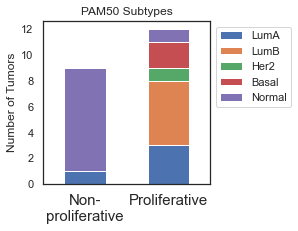

In [20]:
sns.set(style='white', font_scale=1.2)
plt.rcParams['figure.dpi'] = 300  # set default dpi to 300

df = pd.read_csv('../data/classifier/2_class_pam50.csv', index_col=0)
tbl = df.groupby(['ILC Subtype', 'PAM50']).size().unstack().loc[:,['LumA','LumB','Her2','Basal','Normal']].fillna(0)

print(tbl)

sns.set(context='notebook', style='white', palette='deep', font='sans-serif', font_scale=1, color_codes=True)

fig, ax = plt.subplots(figsize=(3,3))

tbl.plot(kind='bar', stacked=True, ax=ax)
# ax.get_legend().remove()
ax.set_ylabel('Number of Tumors')
ax.set_xlabel('')
ax.set_xticklabels(['Non-\nproliferative', 'Proliferative'], fontsize=15, rotation=0, ha='center')

ax.set_title('PAM50 Subtypes')
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')


# Deconvolution

Run `05_deconvolution.R`

## Purity

In [32]:
purity = pd.read_csv('../data/deconv/purity_puree.csv')
purity

sample    purity
0   TP17_M605  0.505112
1   TP18_M403  0.545725
2   TP17_M383  0.651267
3   TP18_M202  0.596360
4   TP18_M355  0.609299
5   TP17_M510  0.620821
6   TP17_M802  0.774018
7   TP17_M882  0.700684
8   TP18_M329  0.493720
9   TP17_M378  0.810059
10  TP17_M384  0.633575
11  TP17_M559  0.541795
12  TP18_M121  0.585659
13  TP18_M278  0.598725
14  TP18_M302  0.562127
15  TP18_M372  0.610485
16   TP18_M95  0.868697
17  TP18_M251  0.861481
18  TP17_M622  0.587586
19  TP17_M899  0.593732
20  TP17_M901  0.585075

In [33]:
print(purity['purity'].min(), purity['purity'].max())

0.4937202911918662 0.8686968979741588


In [34]:
pam50 = pd.read_csv('../data/heatmap/Meta_Subtype_57genes_BulkRNAseqCohort.csv',index_col=0)
pam50

PAM50        ILC Subtype      LumA      LumB      Her2     Basal  \
TP17_M605  Normal  Non-proliferative  0.000000  0.000000  0.000000  0.473421   
TP18_M403  Normal  Non-proliferative  0.009180  0.000000  0.000000  0.457160   
TP17_M383    Her2      Proliferative  0.000000  0.426853  0.573147  0.000000   
TP18_M202  Normal  Non-proliferative  0.307805  0.000000  0.000000  0.095333   
TP18_M355  Normal  Non-proliferative  0.499275  0.000000  0.000000  0.000000   
TP17_M510    LumB      Proliferative  0.415864  0.458086  0.126050  0.000000   
TP17_M802    LumA      Proliferative  0.461848  0.360718  0.177434  0.000000   
TP17_M882    LumB      Proliferative  0.000000  0.613391  0.386609  0.000000   
TP18_M329   Basal      Proliferative  0.000000  0.000000  0.000000  0.666553   
TP17_M378    LumB      Proliferative  0.000000  0.480306  0.343798  0.175897   
TP17_M384    LumA      Proliferative  0.606762  0.000000  0.393238  0.000000   
TP17_M559    LumA  Non-proliferative  0.490286  0.000000  0.000000  0.090427   
TP18_M121  Normal  Non-proliferative  0.242330  0.000000  0.000000  0.162935   
TP18_M278  Normal  Non-proliferative  0.323471  0.000000  0.000000  0.077932   
TP18_M302  Normal  Non-proliferative  0.427704  0.000000  0.000000  0.001666   
TP18_M372    LumA      Proliferative  0.772836  0.000000  0.000000  0.000000   
TP18_M95     LumB      Proliferative  0.377350  0.419873  0.202777  0.000000   
TP18_M251    LumB      Proliferative  0.000000  0.782225  0.217775  0.000000   
TP17_M622   Basal      Proliferative  0.000000  0.000000  0.146638  0.585305   
TP17_M899  Normal      Proliferative  0.434874  0.000000  0.000000  0.000000   
TP17_M901  Normal  Non-proliferative  0.481715  0.000000  0.000000  0.000000   

           Normal-like    Sample ID Tumor type  Age at diagnosis   Race  \
TP17_M605     0.526579   PBC_PR_759        ILC                39  White   
TP18_M403     0.533660   PBC_PR_771        ILC                67  White   
TP17_M383     0.000000  PBC_PR_1120        ILC                41  White   
TP18_M202     0.596862   PBC_PR_764        ILC                56  White   
TP18_M355     0.500725   PBC_PR_769        ILC                61  Other   
TP17_M510     0.000000   PBC_PR_758        ILC                44  White   
TP17_M802     0.000000   PBC_PR_760        ILC                47  White   
TP17_M882     0.000000   PBC_PR_761        ILC                57  White   
TP18_M329     0.333447   PBC_PR_768        ILC                57  White   
TP17_M378     0.000000  PBC_PR_1167        ILC                40  Other   
TP17_M384     0.000000   PBC_PR_778        ILC                57  White   
TP17_M559     0.419286   PBC_PR_779        ILC                66  White   
TP18_M121     0.594735   PBC_PR_763        ILC                50  White   
TP18_M278     0.598597   PBC_PR_766        ILC                75  White   
TP18_M302     0.570630   PBC_PR_767        ILC                56  White   
TP18_M372     0.227164   PBC_PR_770        ILC                62  White   
TP18_M95      0.000000   PBC_PR_762        ILC                68  White   
TP18_M251     0.000000   PBC_PR_765        ILC                74  White   
TP17_M622     0.268057   PBC_PR_780        ILC                79  White   
TP17_M899     0.565126   PBC_PR_781        ILC                37  White   
TP17_M901     0.518285   PBC_PR_782        ILC                45  White   

          Postmenopausal  Pathological grade Pathological stage  Ki67  \
TP17_M605             No                   1                 1A    65   
TP18_M403            Yes                   1                 1A     1   
TP17_M383             No                   3                 3C     3   
TP18_M202            Yes                   2                 1A    15   
TP18_M355            Yes                   2                 1A     5   
TP17_M510             No                   2                 1A    15   
TP17_M802             No                   2                 1A    25   
TP17_M882       

In [35]:
purity = purity.set_index('sample')
purity

purity
sample             
TP17_M605  0.505112
TP18_M403  0.545725
TP17_M383  0.651267
TP18_M202  0.596360
TP18_M355  0.609299
TP17_M510  0.620821
TP17_M802  0.774018
TP17_M882  0.700684
TP18_M329  0.493720
TP17_M378  0.810059
TP17_M384  0.633575
TP17_M559  0.541795
TP18_M121  0.585659
TP18_M278  0.598725
TP18_M302  0.562127
TP18_M372  0.610485
TP18_M95   0.868697
TP18_M251  0.861481
TP17_M622  0.587586
TP17_M899  0.593732
TP17_M901  0.585075

In [36]:
mg = pam50.join(purity)[['PAM50','purity']]
mg

PAM50    purity
TP17_M605  Normal  0.505112
TP18_M403  Normal  0.545725
TP17_M383    Her2  0.651267
TP18_M202  Normal  0.596360
TP18_M355  Normal  0.609299
TP17_M510    LumB  0.620821
TP17_M802    LumA  0.774018
TP17_M882    LumB  0.700684
TP18_M329   Basal  0.493720
TP17_M378    LumB  0.810059
TP17_M384    LumA  0.633575
TP17_M559    LumA  0.541795
TP18_M121  Normal  0.585659
TP18_M278  Normal  0.598725
TP18_M302  Normal  0.562127
TP18_M372    LumA  0.610485
TP18_M95     LumB  0.868697
TP18_M251    LumB  0.861481
TP17_M622   Basal  0.587586
TP17_M899  Normal  0.593732
TP17_M901  Normal  0.585075

(0.4, 1.0)

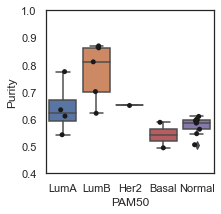

In [37]:
pam50_order = ['LumA', 'LumB', 'Her2', 'Basal', 'Normal']

fig, ax = plt.subplots(figsize=(3,3))
sns.boxplot(data=mg, x='PAM50',y='purity', order=pam50_order)
sns.stripplot(data=mg, x='PAM50',y='purity', order=pam50_order, color='k', jitter=True)

ax.set_ylabel('Purity')
ax.set_ylim([.4,1])

## Estimate

In [39]:
meta = pd.read_csv('../data/classifier/2_class_pam50.csv', index_col=0)
meta

PAM50        ILC Subtype      LumA      LumB      Her2     Basal  \
TP17_M605  Normal  Non-proliferative  0.000000  0.000000  0.000000  0.473421   
TP18_M403  Normal  Non-proliferative  0.009180  0.000000  0.000000  0.457160   
TP17_M383    Her2      Proliferative  0.000000  0.426853  0.573147  0.000000   
TP18_M202  Normal  Non-proliferative  0.307805  0.000000  0.000000  0.095333   
TP18_M355  Normal  Non-proliferative  0.499275  0.000000  0.000000  0.000000   
TP17_M510    LumB      Proliferative  0.415864  0.458086  0.126050  0.000000   
TP17_M802    LumA      Proliferative  0.461848  0.360718  0.177434  0.000000   
TP17_M882    LumB      Proliferative  0.000000  0.613391  0.386609  0.000000   
TP18_M329   Basal      Proliferative  0.000000  0.000000  0.000000  0.666553   
TP17_M378    LumB      Proliferative  0.000000  0.480306  0.343798  0.175897   
TP17_M384    LumA      Proliferative  0.606762  0.000000  0.393238  0.000000   
TP17_M559    LumA  Non-proliferative  0.490286  0.000000  0.000000  0.090427   
TP18_M121  Normal  Non-proliferative  0.242330  0.000000  0.000000  0.162935   
TP18_M278  Normal  Non-proliferative  0.323471  0.000000  0.000000  0.077932   
TP18_M302  Normal  Non-proliferative  0.427704  0.000000  0.000000  0.001666   
TP18_M372    LumA      Proliferative  0.772836  0.000000  0.000000  0.000000   
TP18_M95     LumB      Proliferative  0.377350  0.419873  0.202777  0.000000   
TP18_M251    LumB      Proliferative  0.000000  0.782225  0.217775  0.000000   
TP17_M622   Basal      Proliferative  0.000000  0.000000  0.146638  0.585305   
TP17_M899  Normal      Proliferative  0.434874  0.000000  0.000000  0.000000   
TP17_M901  Normal  Non-proliferative  0.481715  0.000000  0.000000  0.000000   

           Normal-like  
TP17_M605     0.526579  
TP18_M403     0.533660  
TP17_M383     0.000000  
TP18_M202     0.596862  
TP18_M355     0.500725  
TP17_M510     0.000000  
TP17_M802     0.000000  
TP17_M882     0.000000  
TP18_M329     0.333447  
TP17_M378     0.000000  
TP17_M384     0.000000  
TP17_M559     0.419286  
TP18_M121     0.594735  
TP18_M278     0.598597  
TP18_M302     0.570630  
TP18_M372     0.227164  
TP18_M95      0.000000  
TP18_M251     0.000000  
TP17_M622     0.268057  
TP17_M899     0.565126  
TP17_M901     0.518285

In [40]:
est = pd.read_csv('../data/deconv/deconvolute_estimate.csv', index_col=0).T
est

StromalScore  ImmuneScore  ESTIMATEScore  TumorPurity
TP17_M605   1261.167388  1236.225520    2497.392908     0.563999
TP18_M403   1656.005419  1820.957816    3476.963236     0.439850
TP17_M383    685.518125   -95.476464     590.041660     0.770228
TP18_M202   1261.399582  1033.729730    2295.129312     0.588264
TP18_M355   1243.608398  1001.449646    2245.058043     0.594192
TP17_M510    605.872316   936.522861    1542.395177     0.673847
TP17_M802    -22.624893   480.295560     457.670667     0.782474
TP17_M882    232.594440   936.535514    1169.129954     0.713299
TP18_M329    998.270299  2004.581511    3002.851810     0.501235
TP17_M378     28.551182  -155.799733    -127.248551     0.832989
TP17_M384    788.829477   335.065413    1123.894890     0.717937
TP17_M559   1609.640980  1396.784964    3006.425944     0.500781
TP18_M121    871.491161  -268.053661     603.437500     0.768972
TP18_M278   1170.371254   876.815390    2047.186643     0.617300
TP18_M302    334.413700   622.560376     956.974076     0.734776
TP18_M372    760.776901   980.977965    1741.754866     0.651940
TP18_M95    -521.318232  -454.532053    -975.850286     0.895277
TP18_M251   -539.342996  -639.099820   -1178.442815     0.908128
TP17_M622    596.134247  1657.243781    2253.378028     0.593209
TP17_M899   1210.096924   918.331561    2128.428484     0.607874
TP17_M901    394.755061   995.260637    1390.015698     0.690204

In [41]:
mg = meta[['ILC Subtype']].join(est)

mg = mg[['TumorPurity','StromalScore','ImmuneScore','ILC Subtype']]
mg.columns = ['Tumor Purity','Stromal Score','Immune Score','ILC Subtype']
mg

Tumor Purity  Stromal Score  Immune Score        ILC Subtype
TP17_M605      0.563999    1261.167388   1236.225520  Non-proliferative
TP18_M403      0.439850    1656.005419   1820.957816  Non-proliferative
TP17_M383      0.770228     685.518125    -95.476464      Proliferative
TP18_M202      0.588264    1261.399582   1033.729730  Non-proliferative
TP18_M355      0.594192    1243.608398   1001.449646  Non-proliferative
TP17_M510      0.673847     605.872316    936.522861      Proliferative
TP17_M802      0.782474     -22.624893    480.295560      Proliferative
TP17_M882      0.713299     232.594440    936.535514      Proliferative
TP18_M329      0.501235     998.270299   2004.581511      Proliferative
TP17_M378      0.832989      28.551182   -155.799733      Proliferative
TP17_M384      0.717937     788.829477    335.065413      Proliferative
TP17_M559      0.500781    1609.640980   1396.784964  Non-proliferative
TP18_M121      0.768972     871.491161   -268.053661  Non-proliferative
TP18_M278      0.617300    1170.371254    876.815390  Non-proliferative
TP18_M302      0.734776     334.413700    622.560376  Non-proliferative
TP18_M372      0.651940     760.776901    980.977965      Proliferative
TP18_M95       0.895277    -521.318232   -454.532053      Proliferative
TP18_M251      0.908128    -539.342996   -639.099820      Proliferative
TP17_M622      0.593209     596.134247   1657.243781      Proliferative
TP17_M899      0.607874    1210.096924    918.331561      Proliferative
TP17_M901      0.690204     394.755061    995.260637  Non-proliferative

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.066e-02 U_stat=2.600e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.488e-03 U_stat=9.100e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.452e-01 U_stat=7.500e+01


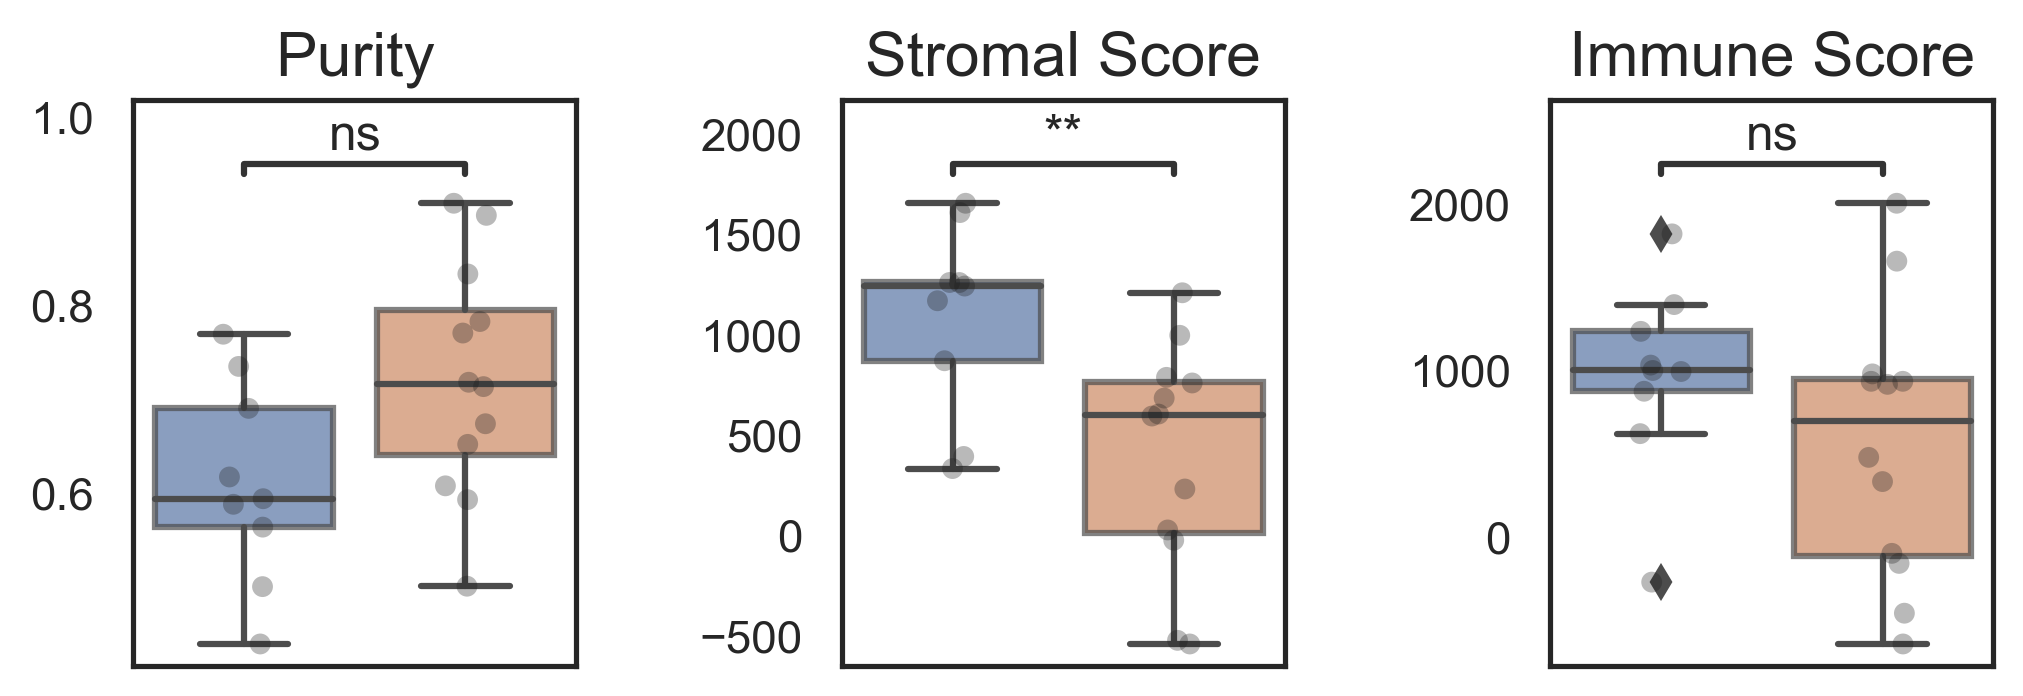

In [42]:
sns.set(style='white', font_scale=1)
plt.rcParams['figure.dpi'] = 300  # set default dpi to 300

group_name = 'ILC Subtype'
terms = ['Tumor Purity','Stromal Score','Immune Score']#,'estimate']
fig,axes = plt.subplots(ncols=len(terms), figsize=(8,2.5))

fig.subplots_adjust(hspace=0, wspace=.6)

for idx,name in enumerate(terms):
    
    ax = axes.flatten()[idx]
    
    mg[name] = mg[name].astype(float)
 #     sorted_cells = mg[name].median().sort_values(ascending=False).index
    sns.boxplot(data=mg, x=group_name,y=name, ax=ax, boxprops=dict(alpha=.7))
    sns.stripplot(data=mg, x=group_name,y=name, ax=ax, alpha=.3, size=5, jitter=True, color='k')
    ax.set_xlabel(''); ax.set_ylabel('')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 20, ha='right')
    
    title = ['Purity','Stromal Score','Immune Score'][idx]
    ax.set_title(title, fontsize=15)
    ax.set_xticklabels('')

    pairs = [('Non-proliferative', 'Proliferative')]
    
    hue_plot_params = {
    'data': mg,
    'x': group_name,
    'y': name
}
    
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction='fdr_bh')
    annotator.apply_and_annotate()
    


# ILC Subtype Gene Expression

## Pathway

In [46]:
dat= pd.read_csv('../data/gex/tpm.csv', index_col=0)
dat

TP17_M605   TP18_M403   TP17_M383   TP18_M202   TP18_M355  \
A1BG        6.535334    4.161530    5.570350    5.907611    4.779306   
A1BG-AS1    2.545052    6.013481   22.699052    6.239180    3.853997   
A1CF        0.403729    0.000000    0.000000    0.000000    0.048534   
A2M       657.010931  680.840758  325.177528  506.891747  538.292350   
A2M-AS1     6.156820    4.704603    0.574219    2.555566    2.696212   
...              ...         ...         ...         ...         ...   
ZYG11A      1.392079    2.949833    1.470168    1.744797    2.355170   
ZYG11B     19.093485   14.648493    9.485727   13.515308   16.216894   
ZYX       121.028630  150.518284   86.407810  158.832283  128.956822   
ZZEF1      57.962510   46.049788   42.025902   54.792090   47.445260   
ZZZ3       37.829061   39.295235   27.968576   48.298092   58.056034   

           TP17_M510   TP17_M802   TP17_M882   TP18_M329  TP17_M378  ...  \
A1BG        1.874317    4.368952    6.814545    3.001509   5.326213  ...   
A1BG-AS1    4.273530    4.042313    8.348498    3.338333   7.611799  ...   
A1CF        0.000000    0.000000    0.000000    0.000000   0.000000  ...   
A2M       424.826267  180.334420  598.556942  474.668383  91.726070  ...   
A2M-AS1     4.729715    1.994044    0.410652    7.891853   0.254659  ...   
...              ...         ...         ...         ...        ...  ...   
ZYG11A      3.487520    6.283484    4.352748    0.090811   7.432816  ...   
ZYG11B     12.119955   12.071928   16.170581   11.123041  14.820714  ...   
ZYX        92.404186  121.954419   73.763824  122.612849  60.969781  ...   
ZZEF1      53.739189   32.756000   63.099223   46.290550  21.152356  ...   
ZZZ3       30.506444   36.717976   39.348018   33.637951  33.038951  ...   

           TP17_M559   TP18_M121   TP18_M278   TP18_M302   TP18_M372  \
A1BG        3.573307    5.621954    7.049682    4.944053    3.805416   
A1BG-AS1    3.801145    7.386220    5.674707    5.285751    5.309804   
A1CF        0.049980    0.000000    0.000000    0.000000    0.000000   
A2M       771.992325  467.653846  427.192727  588.469717  229.609720   
A2M-AS1     3.157652    1.396837    1.713310    2.258811    5.845946   
...              ...         ...         ...         ...         ...   
ZYG11A      2.062943    2.932573    6.990213    4.518975    3.377241   
ZYG11B     12.561664   13.319621   13.865604   13.531556   10.911317   
ZYX       167.703388  149.630990  191.003837  134.064759   94.039326   
ZZEF1      78.680256   71.620190   66.179530   64.524683   56.991371   
ZZZ3       40.508982   44.351072   42.519927   47.783995   43.208002   

            TP18_M95  TP18_M251   TP17_M622   TP17_M899    TP17_M901  
A1BG        0.000000   6.093650    8.752924    4.516031   474.202802  
A1BG-AS1    2.660658   5.123453    8.232538    3.664612     2.330200  
A1CF        0.000000   0.000000    0.000000    0.000000    35.147703  
A2M       107.485608  66.549559  394.256515  551.730371  1084.549737  
A2M-AS1     0.000000   0.935610   12.197958    2.482852     0.000000  
...              ...        ...         ...         ...          ...  
ZYG11A      6.413363   4.577939    3.794337    2.026237     3.438540  
ZYG11B     11.542753  12.444578   10.880704   12.921422     8.826606  
ZYX        58.162953  31.089354  132.551094  109.274008    42.250977  
ZZEF1      52.262258  44.725770   34.795732   38.672954    32.876619  
ZZZ3       61.456427  31.313777   42.134017   31.265003    20.785864  

[26485 rows x 21 columns]

In [47]:
meta = pd.read_csv('../data/classifier/2_class_pam50.csv', index_col=0)
meta

PAM50        ILC Subtype      LumA      LumB      Her2     Basal  \
TP17_M605  Normal  Non-proliferative  0.000000  0.000000  0.000000  0.473421   
TP18_M403  Normal  Non-proliferative  0.009180  0.000000  0.000000  0.457160   
TP17_M383    Her2      Proliferative  0.000000  0.426853  0.573147  0.000000   
TP18_M202  Normal  Non-proliferative  0.307805  0.000000  0.000000  0.095333   
TP18_M355  Normal  Non-proliferative  0.499275  0.000000  0.000000  0.000000   
TP17_M510    LumB      Proliferative  0.415864  0.458086  0.126050  0.000000   
TP17_M802    LumA      Proliferative  0.461848  0.360718  0.177434  0.000000   
TP17_M882    LumB      Proliferative  0.000000  0.613391  0.386609  0.000000   
TP18_M329   Basal      Proliferative  0.000000  0.000000  0.000000  0.666553   
TP17_M378    LumB      Proliferative  0.000000  0.480306  0.343798  0.175897   
TP17_M384    LumA      Proliferative  0.606762  0.000000  0.393238  0.000000   
TP17_M559    LumA  Non-proliferative  0.490286  0.000000  0.000000  0.090427   
TP18_M121  Normal  Non-proliferative  0.242330  0.000000  0.000000  0.162935   
TP18_M278  Normal  Non-proliferative  0.323471  0.000000  0.000000  0.077932   
TP18_M302  Normal  Non-proliferative  0.427704  0.000000  0.000000  0.001666   
TP18_M372    LumA      Proliferative  0.772836  0.000000  0.000000  0.000000   
TP18_M95     LumB      Proliferative  0.377350  0.419873  0.202777  0.000000   
TP18_M251    LumB      Proliferative  0.000000  0.782225  0.217775  0.000000   
TP17_M622   Basal      Proliferative  0.000000  0.000000  0.146638  0.585305   
TP17_M899  Normal      Proliferative  0.434874  0.000000  0.000000  0.000000   
TP17_M901  Normal  Non-proliferative  0.481715  0.000000  0.000000  0.000000   

           Normal-like  
TP17_M605     0.526579  
TP18_M403     0.533660  
TP17_M383     0.000000  
TP18_M202     0.596862  
TP18_M355     0.500725  
TP17_M510     0.000000  
TP17_M802     0.000000  
TP17_M882     0.000000  
TP18_M329     0.333447  
TP17_M378     0.000000  
TP17_M384     0.000000  
TP17_M559     0.419286  
TP18_M121     0.594735  
TP18_M278     0.598597  
TP18_M302     0.570630  
TP18_M372     0.227164  
TP18_M95      0.000000  
TP18_M251     0.000000  
TP17_M622     0.268057  
TP17_M899     0.565126  
TP17_M901     0.518285

In [55]:
gsva1 = pd.read_csv('../data/gsva/ILC21pt_MsigdbCanonical.ssgsea.csv', index_col=0)
gsva2 = pd.read_csv('../data/gsva/ILC21pt_MsigdbHallmark.ssgsea.csv', index_col=0)
gsva = pd.concat((gsva1,gsva2))
gsva

TP17_M605  TP18_M403  TP17_M383  TP18_M202  \
BIOCARTA_GRANULOCYTES_PATHWAY   0.105709   0.158115   0.047790   0.121063   
BIOCARTA_LYM_PATHWAY            0.201361   0.197585   0.121971   0.183995   
BIOCARTA_BLYMPHOCYTE_PATHWAY    0.229485   0.272626   0.179275   0.248004   
BIOCARTA_CARM_ER_PATHWAY        0.322296   0.307355   0.327442   0.329612   
BIOCARTA_LAIR_PATHWAY           0.223413   0.251981   0.160877   0.227004   
...                                  ...        ...        ...        ...   
HALLMARK_ALLOGRAFT_REJECTION    0.396315   0.430758   0.300197   0.395794   
HALLMARK_SPERMATOGENESIS        0.148000   0.079299   0.113021   0.095700   
HALLMARK_KRAS_SIGNALING_UP      0.431167   0.435391   0.331939   0.415925   
HALLMARK_KRAS_SIGNALING_DN      0.041274  -0.022970  -0.015762   0.017895   
HALLMARK_PANCREAS_BETA_CELLS    0.051316   0.002552  -0.087339   0.014078   

                               TP18_M355  TP17_M510  TP17_M802  TP17_M882  \
BIOCARTA_GRANULOCYTES_PATHWAY   0.110070   0.112719   0.087186   0.132996   
BIOCARTA_LYM_PATHWAY            0.164807   0.170517   0.128854   0.163143   
BIOCARTA_BLYMPHOCYTE_PATHWAY    0.226275   0.243943   0.186085   0.217968   
BIOCARTA_CARM_ER_PATHWAY        0.318447   0.320848   0.326826   0.331556   
BIOCARTA_LAIR_PATHWAY           0.188229   0.197047   0.172486   0.186089   
...                                  ...        ...        ...        ...   
HALLMARK_ALLOGRAFT_REJECTION    0.365401   0.380934   0.337407   0.364958   
HALLMARK_SPERMATOGENESIS        0.121469   0.124383   0.122438   0.123670   
HALLMARK_KRAS_SIGNALING_UP      0.401337   0.373364   0.326083   0.346193   
HALLMARK_KRAS_SIGNALING_DN      0.006118  -0.013642  -0.024941  -0.044131   
HALLMARK_PANCREAS_BETA_CELLS    0.030719  -0.052813  -0.026518  -0.010614   

                               TP18_M329  TP17_M378  ...  TP17_M559  \
BIOCARTA_GRANULOCYTES_PATHWAY   0.180602   0.046127  ...   0.156111   
BIOCARTA_LYM_PATHWAY            0.240962   0.092737  ...   0.211007   
BIOCARTA_BLYMPHOCYTE_PATHWAY    0.282745   0.143876  ...   0.276381   
BIOCARTA_CARM_ER_PATHWAY        0.330337   0.322369  ...   0.330508   
BIOCARTA_LAIR_PATHWAY           0.268369   0.119263  ...   0.255246   
...                                  ...        ...  ...        ...   
HALLMARK_ALLOGRAFT_REJECTION    0.484369   0.282285  ...   0.399997   
HALLMARK_SPERMATOGENESIS        0.101065   0.160764  ...   0.128887   
HALLMARK_KRAS_SIGNALING_UP      0.433881   0.272911  ...   0.426463   
HALLMARK_KRAS_SIGNALING_DN      0.010645  -0.030010  ...   0.019808   
HALLMARK_PANCREAS_BETA_CELLS   -0.020467  -0.029601  ...   0.045341   

                               TP18_M121  TP18_M278  TP18_M302  TP18_M372  \
BIOCARTA_GRANULOCYTES_PATHWAY   0.054129   0.134660   0.086148   0.087123   
BIOCARTA_LYM_PATHWAY            0.134228   0.181387   0.152605   0.160406   
BIOCARTA_BLYMPHOCYTE_PATHWAY    0.112509   0.214802   0.187723   0.227024   
BIOCARTA_CARM_ER_PATHWAY        0.334313   0.330635   0.318737   0.316852   
BIOCARTA_LAIR_PATHWAY           0.186547   0.244351   0.208292   0.180561   
...                                  ...        ...        ...        ...   
HALLMARK_ALLOGRAFT_REJECTION    0.264832   0.353848   0.348349   0.365466   
HALLMARK_SPERMATOGENESIS        0.116113   0.112314   0.115389   0.105841   
HALLMARK_KRAS_SIGNALING_UP      0.372218   0.431861   0.361920   0.366488   
HALLMARK_KRAS_SIGNALING_DN      0.015552   0.003981   0.000704   0.003979   
HALLMARK_PANCREAS_BETA_CELLS    0.014523  -0.021690   0.004736  -0.057627   

                               TP18_M95  TP18_M251  TP17_M622  TP17_M899  \
BIOCARTA_GRANULOCYTES_PATHWAY  0.039405   0.026133   0.151180   0.131271   
BIOCARTA_LYM_PATHWAY           0.087513   0.056338   0.202308   0.195815   
BIOCARTA_BLYMPHOCYTE_PATHWAY   0.095485   0.071125   0.218642   0.240323   
BIOCARTA_CARM_ER_PATHWAY       0.313844   0.334889   0.325304   0.309827   
BIOCARTA_LAIR_PATHWAY  

In [56]:
mg = meta[['ILC Subtype']].join(gsva.T)
mg

ILC Subtype  BIOCARTA_GRANULOCYTES_PATHWAY  \
TP17_M605  Non-proliferative                       0.105709   
TP18_M403  Non-proliferative                       0.158115   
TP17_M383      Proliferative                       0.047790   
TP18_M202  Non-proliferative                       0.121063   
TP18_M355  Non-proliferative                       0.110070   
TP17_M510      Proliferative                       0.112719   
TP17_M802      Proliferative                       0.087186   
TP17_M882      Proliferative                       0.132996   
TP18_M329      Proliferative                       0.180602   
TP17_M378      Proliferative                       0.046127   
TP17_M384      Proliferative                       0.063293   
TP17_M559  Non-proliferative                       0.156111   
TP18_M121  Non-proliferative                       0.054129   
TP18_M278  Non-proliferative                       0.134660   
TP18_M302  Non-proliferative                       0.086148   
TP18_M372      Proliferative                       0.087123   
TP18_M95       Proliferative                       0.039405   
TP18_M251      Proliferative                       0.026133   
TP17_M622      Proliferative                       0.151180   
TP17_M899      Proliferative                       0.131271   
TP17_M901  Non-proliferative                       0.144300   

           BIOCARTA_LYM_PATHWAY  BIOCARTA_BLYMPHOCYTE_PATHWAY  \
TP17_M605              0.201361                      0.229485   
TP18_M403              0.197585                      0.272626   
TP17_M383              0.121971                      0.179275   
TP18_M202              0.183995                      0.248004   
TP18_M355              0.164807                      0.226275   
TP17_M510              0.170517                      0.243943   
TP17_M802              0.128854                      0.186085   
TP17_M882              0.163143                      0.217968   
TP18_M329              0.240962                      0.282745   
TP17_M378              0.092737                      0.143876   
TP17_M384              0.114231                      0.185918   
TP17_M559              0.211007                      0.276381   
TP18_M121              0.134228                      0.112509   
TP18_M278              0.181387                      0.214802   
TP18_M302              0.152605                      0.187723   
TP18_M372              0.160406                      0.227024   
TP18_M95               0.087513                      0.095485   
TP18_M251              0.056338                      0.071125   
TP17_M622              0.202308                      0.218642   
TP17_M899              0.195815                      0.240323   
TP17_M901              0.168300                      0.249693   

           BIOCARTA_CARM_ER_PATHWAY  BIOCARTA_LAIR_PATHWAY  \
TP17_M605                  0.322296               0.223413   
TP18_M403                  0.307355               0.251981   
TP17_M383                  0.327442               0.160877   
TP18_M202                  0.329612               0.227004   
TP18_M355                  0.318447               0.188229   
TP17_M510                  0.320848               0.197047   
TP17_M802                  0.326826               0.172486   
TP17_M882                  0.331556               0.186089   
TP18_M329                  0.330337               0.268369   
TP17_M378                  0.322369               0.119263   
TP17_M384                  0.325671               0.161634   
TP17_M559                  0.330508               0.255246   
TP18_M121                  0.334313               0.186547   
TP18_M278                  0.330635               0.244351   
TP18_M302                  0.318737               0.208292   
TP18_M372                  0.316852               0.180561   
TP18_M95                   0.313844               0.107843   
TP18_M251                  0.334889               0.106226   
TP17_M622            

In [57]:
mg['REACTOME_CLASS_A1_RHODOPSIN_LIKE_RECEPTORS'] = mg['REACTOME_CLASS_A_1_RHODOPSIN_LIKE_RECEPTORS']
mg['PID_CD8TCRDOWNSTREAMPATHWAY'] = mg['PID_CD8_TCR_DOWNSTREAM_PATHWAY']

mg['REACTOME_DOWNSTREAM_TCR_SIGNALING'] = mg['REACTOME_TCR_SIGNALING']
mg['PID_CD8TCRPATHWAY'] = mg['PID_CD8_TCR_PATHWAY']
mg['PID_IL12_STAT4PATHWAY'] = mg['PID_IL12_STAT4_PATHWAY']

mg['PID_FOXM1PATHWAY'] = mg['PID_FOXM1_PATHWAY']
mg['PID_P53REGULATIONPATHWAY'] = mg['PID_P53_REGULATION_PATHWAY']

In [59]:
# immune related pathways in rathor
genes_ir = pd.read_excel('../data/geneset/rather_ir_hr_pathways_supp8.xlsx',\
                         sheet_name='rather_ir')['name'].tolist()

pathways_sel = [x for x in genes_ir if x in mg.columns]
print(len(genes_ir), len(pathways_sel))
pathways_sel

46 46


['KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION',
 'KEGG_CELL_ADHESION_MOLECULES_CAMS',
 'KEGG_JAK_STAT_SIGNALING_PATHWAY',
 'KEGG_HEMATOPOIETIC_CELL_LINEAGE',
 'KEGG_INTESTINAL_IMMUNE_NETWORK_FOR_IGA_PRODUCTION',
 'KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY',
 'REACTOME_CHEMOKINE_RECEPTORS_BIND_CHEMOKINES',
 'KEGG_CHEMOKINE_SIGNALING_PATHWAY',
 'REACTOME_IMMUNOREGULATORY_INTERACTIONS_BETWEEN_A_LYMPHOID_AND_A_NON_LYMPHOID_CELL',
 'REACTOME_CLASS_A1_RHODOPSIN_LIKE_RECEPTORS',
 'REACTOME_COMPLEMENT_CASCADE',
 'REACTOME_TCR_SIGNALING',
 'BIOCARTA_KERATINOCYTE_PATHWAY',
 'PID_TXA2PATHWAY',
 'BIOCARTA_TOB1_PATHWAY',
 'BIOCARTA_IL12_PATHWAY',
 'KEGG_AUTOIMMUNE_THYROID_DISEASE',
 'REACTOME_INNATE_IMMUNE_SYSTEM',
 'REACTOME_SYNTHESIS_SECRETION_AND_DEACYLATION_OF_GHRELIN',
 'KEGG_CALCIUM_SIGNALING_PATHWAY',
 'REACTOME_PEPTIDE_LIGAND_BINDING_RECEPTORS',
 'PID_CD40_PATHWAY',
 'PID_CD8TCRDOWNSTREAMPATHWAY',
 'KEGG_PRIMARY_IMMUNODEFICIENCY',
 'BIOCARTA_LAIR_PATHWAY',
 'REACTOME_GPCR_LIGAND_BINDIN

In [60]:
group_name = 'ILC Subtype'
terms = pathways_sel
fig,axes = plt.subplots(ncols=9, nrows=6, figsize=(32,28))


fig.subplots_adjust(hspace=.9, wspace=1.2)

for idx,name in enumerate(terms):
    
    ax = axes.flatten()[idx]
    
    mg[name] = mg[name].astype(float)
 #     sorted_cells = mg[name].median().sort_values(ascending=False).index
    sns.boxplot(data=mg, x=group_name,y=name, ax=ax, boxprops=dict(alpha=.7))
    sns.stripplot(data=mg, x=group_name,y=name, ax=ax, alpha=.3, size=5, jitter=True, color='k')
    ax.set_xlabel(''); ax.set_ylabel('')
    
    title = join_with_linebreaks(name.split('_'))
    ax.set_title(title, fontsize=15, pad=-10)

    ax.set_xticklabels(ax.get_xticklabels(), rotation = 10, ha='right')

    
    pairs = [('Non-proliferative', 'Proliferative')]
    
    hue_plot_params = {
    'data': mg,
    'x': group_name,
    'y': name
}
    
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction='fdr_bh')
    annotator.apply_and_annotate()
    
for idx in range(46,54):
    fig.delaxes(axes.flatten()[idx])

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.966e-02 U_stat=8.100e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.658e-01 U_stat=7.400e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.164e-02 U_stat=9.000e+01
p-value annotation legend:
 

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.717e-01 U_stat=5.500e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.441e-01 U_stat=6.100e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.744e-01 U_stat=6.700e+01
p-value annotation legend:
 

In [61]:
sig_pathways_idx = [2,12,13,18,19,24,32,33,40,41] # manual counting pathways showing significant difference from above

sig_pathways = np.array(pathways_sel)[sig_pathways_idx]
len(sig_pathways)

10

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.164e-02 U_stat=9.000e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.218e-03 U_stat=9.300e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.091e-02 U_stat=8.700e+01
p-value annotation legend:
 

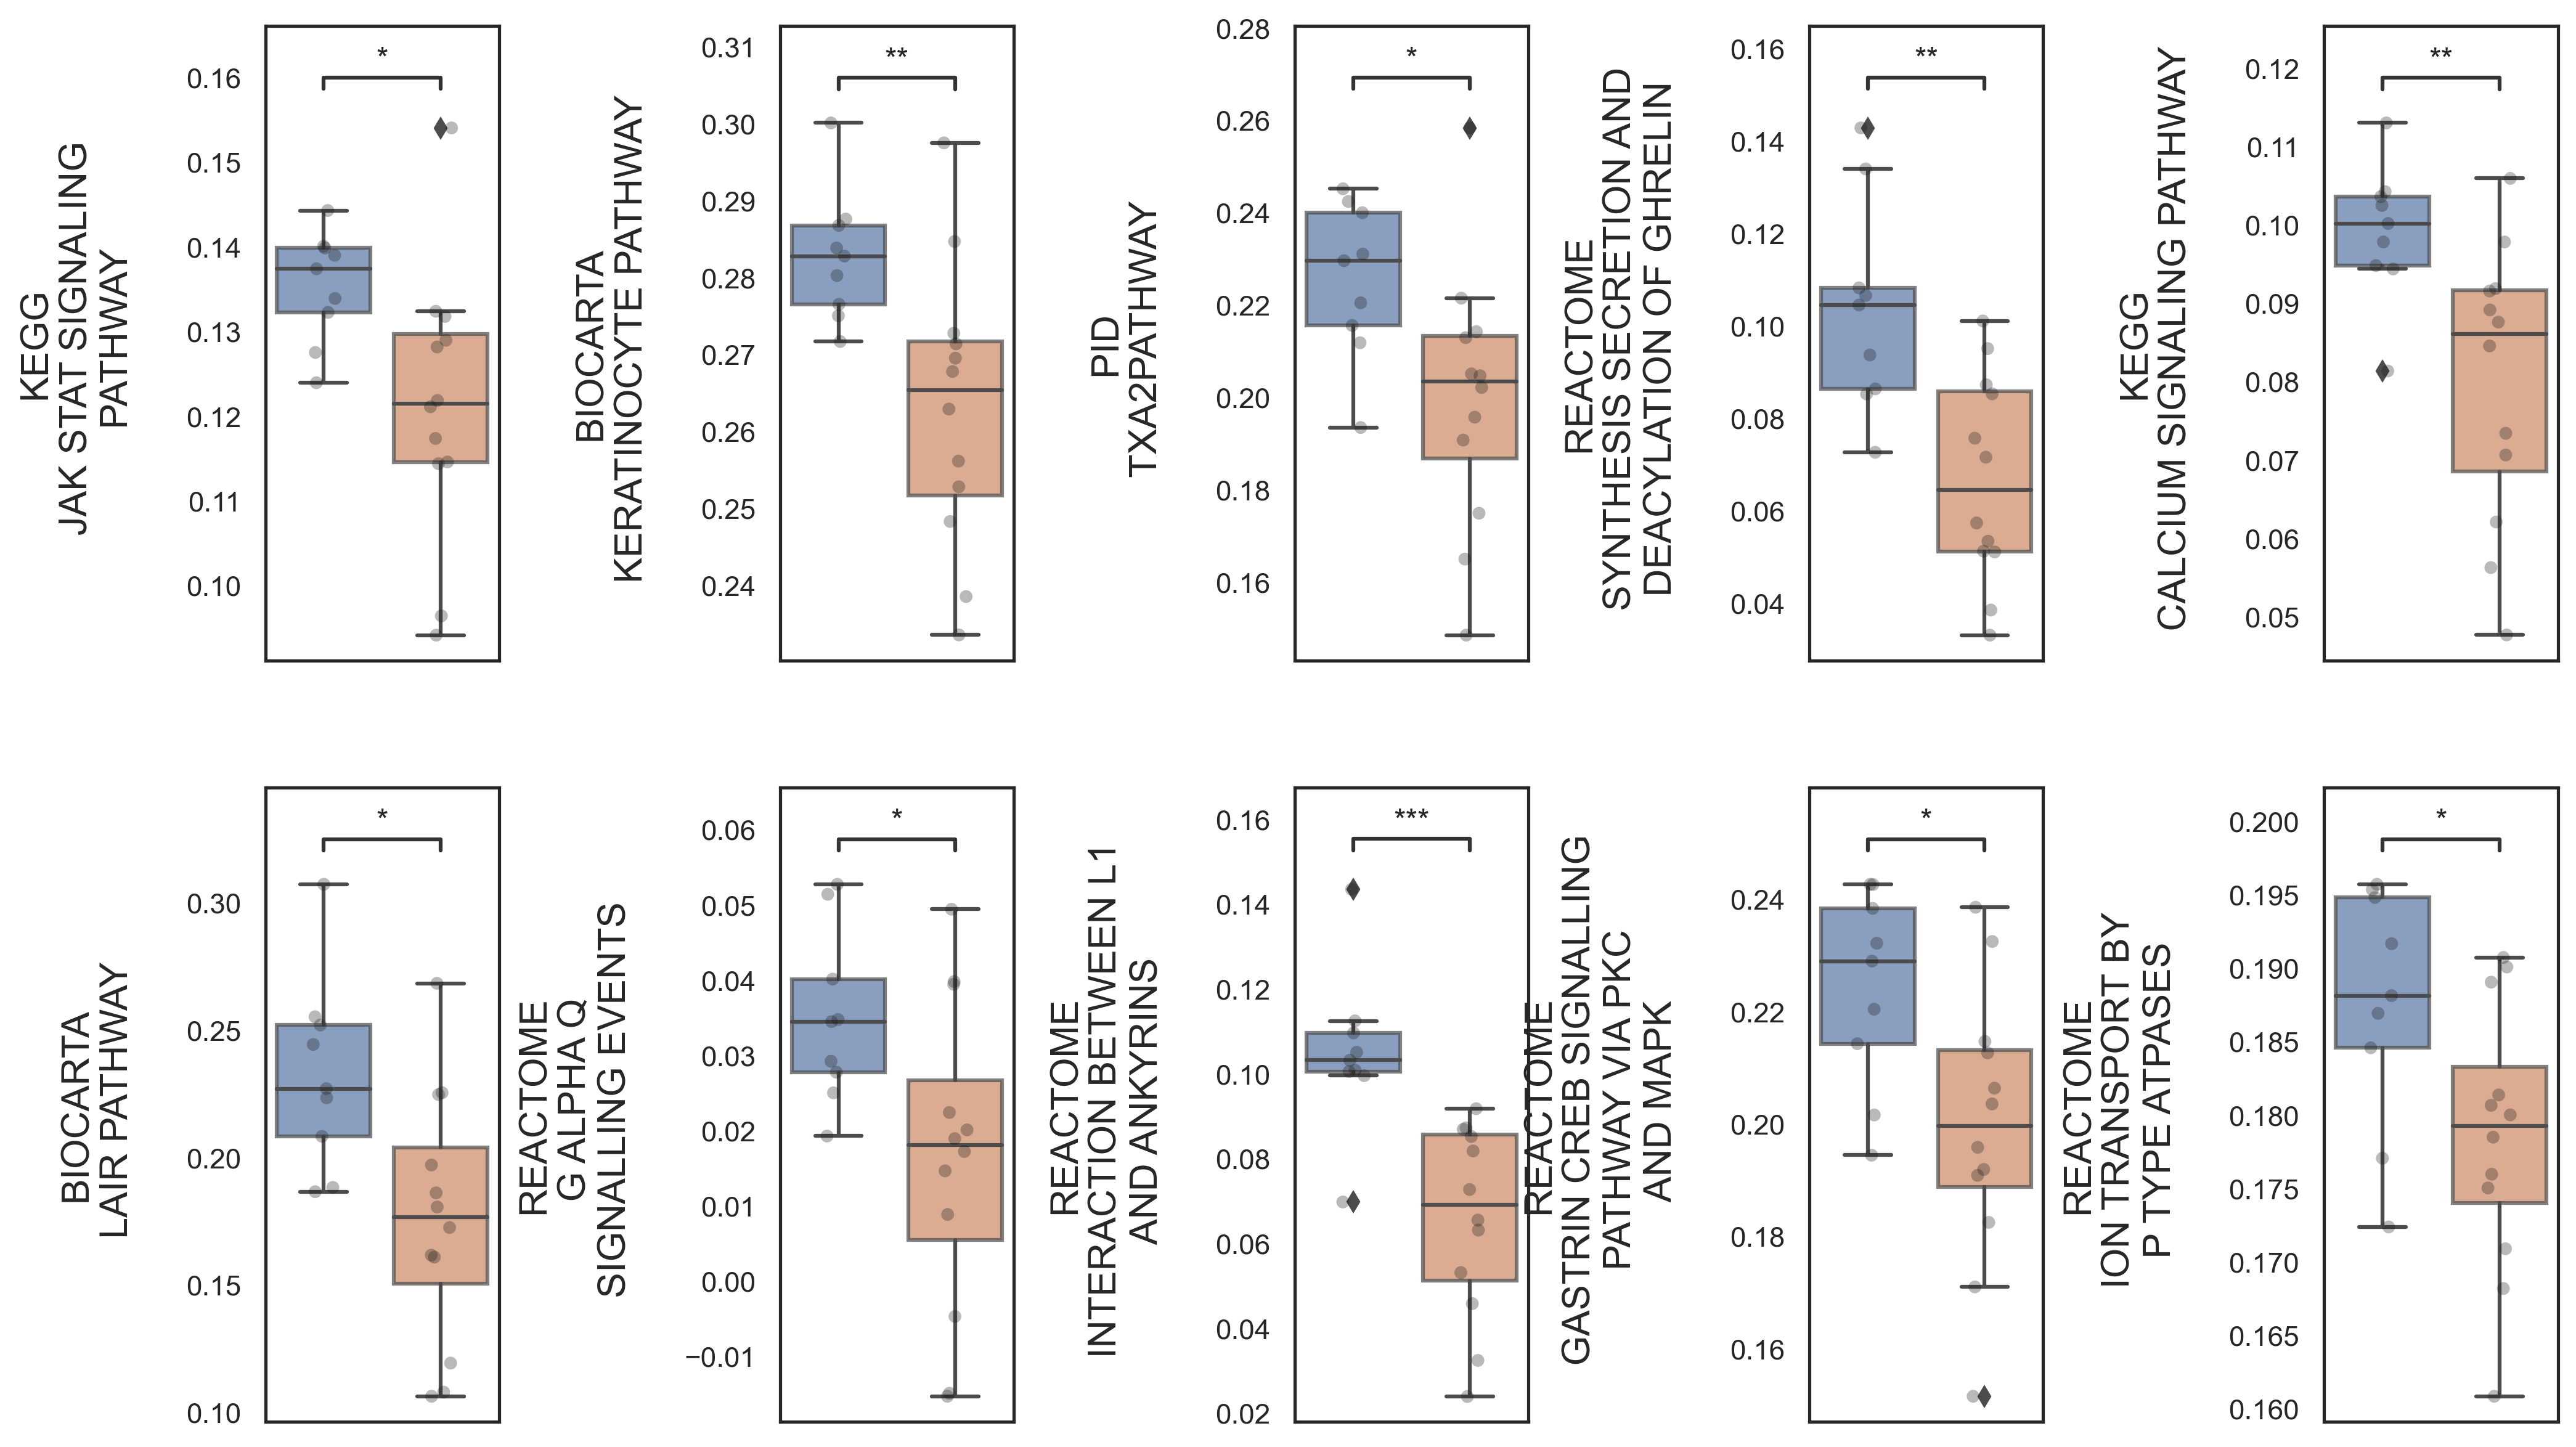

In [62]:
group_name = 'ILC Subtype'
terms = sig_pathways

fig,axes = plt.subplots(ncols=5, nrows=2, figsize=(16,10))
fig.subplots_adjust(hspace=.2, wspace=1.2)

for idx,name in enumerate(terms):
    
    ax = axes.flatten()[idx]
    
    mg[name] = mg[name].astype(float)
 #     sorted_cells = mg[name].median().sort_values(ascending=False).index
    sns.boxplot(data=mg, x=group_name,y=name, ax=ax, boxprops=dict(alpha=.7))
    sns.stripplot(data=mg, x=group_name,y=name, ax=ax, alpha=.3, size=5, jitter=True, color='k')
    ax.set_xlabel(''); ax.set_ylabel('')
    
    title = join_with_linebreaks(name.split('_'))
    ax.set_ylabel(title, fontsize=15)

    ax.set_xticklabels('')#(ax.get_xticklabels(), rotation = 90)

    
    pairs = [('Non-proliferative', 'Proliferative')]
    
    hue_plot_params = {
    'data': mg,
    'x': group_name,
    'y': name
}
    
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction='fdr_bh')
    annotator.apply_and_annotate()
    

In [63]:
genes_hr = pd.read_excel('../data/geneset/rather_ir_hr_pathways_supp8.xlsx',\
                         sheet_name='rather_hr')['name'].tolist()


pathways_sel = [p for p in genes_hr if p in mg.columns]
print(len(pathways_sel))

[p for p in genes_hr if p not in mg.columns]

8


['REACTOME_LOSS_OF_NLP_FROM_MITOTIC_CENTROSOMES']

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.164e-02 U_stat=1.800e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.488e-03 U_stat=1.700e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.511e-04 U_stat=7.000e+00
p-value annotation legend:
 

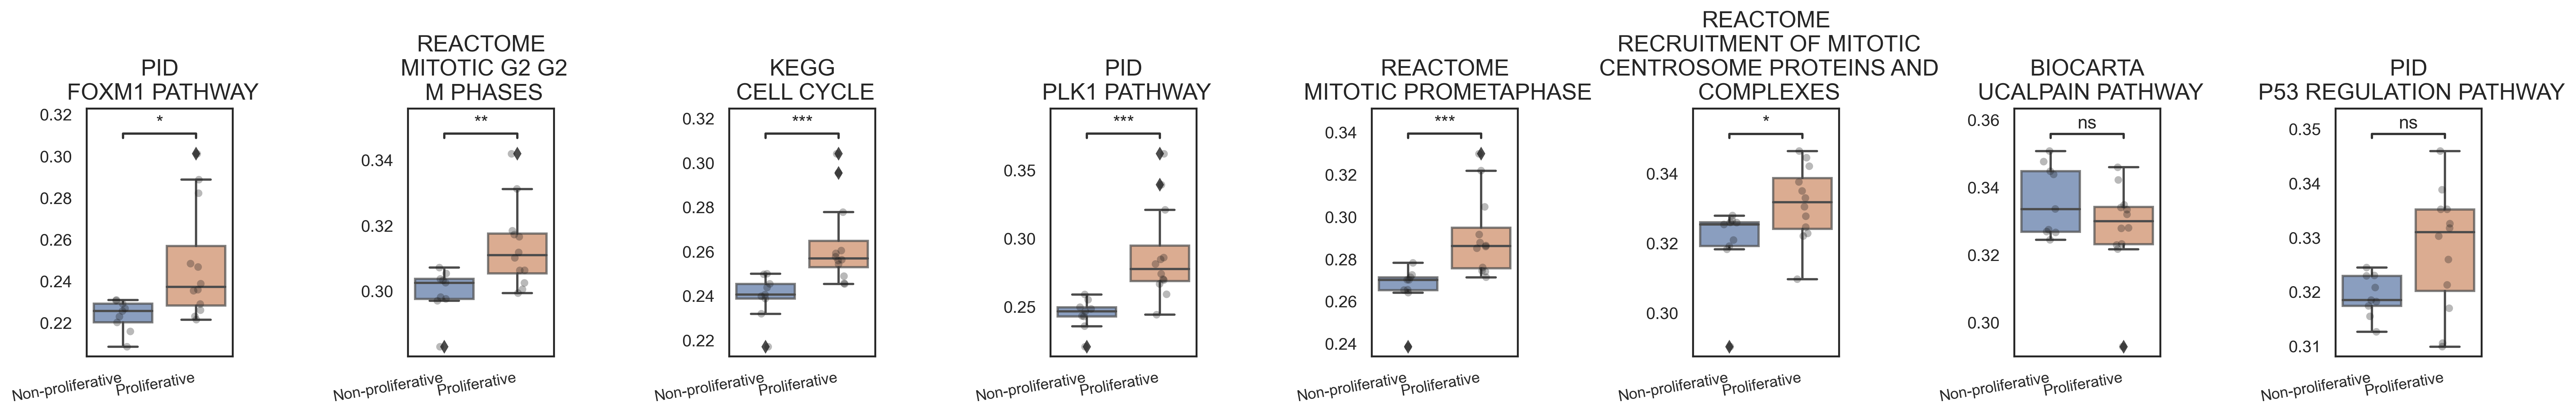

In [64]:
group_name = 'ILC Subtype'
terms = pathways_sel
fig,axes = plt.subplots(ncols=9, nrows=1, figsize=(32,3))


fig.subplots_adjust(hspace=.9, wspace=1.2)

for idx,name in enumerate(terms):
    
    ax = axes.flatten()[idx]
    
    mg[name] = mg[name].astype(float)
 #     sorted_cells = mg[name].median().sort_values(ascending=False).index
    sns.boxplot(data=mg, x=group_name,y=name, ax=ax, boxprops=dict(alpha=.7))
    sns.stripplot(data=mg, x=group_name,y=name, ax=ax, alpha=.3, size=5, jitter=True, color='k')
    ax.set_xlabel(''); ax.set_ylabel('')
    
    title = join_with_linebreaks(name.split('_'))
    ax.set_title(title, fontsize=15, pad=-10)

    ax.set_xticklabels(ax.get_xticklabels(), rotation = 10, ha='right', fontsize=10)

    
    pairs = [('Non-proliferative', 'Proliferative')]
    
    hue_plot_params = {
    'data': mg,
    'x': group_name,
    'y': name
}
    
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction='fdr_bh')
    annotator.apply_and_annotate()
    
for idx in range(8,9):
    fig.delaxes(axes.flatten()[idx])

In [65]:
sig_pathways_idx = [0,1,2,3,4,5] # manual counting from above

sig_pathways = np.array(terms)[sig_pathways_idx]
len(sig_pathways)

6

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.164e-02 U_stat=1.800e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.488e-03 U_stat=1.700e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.511e-04 U_stat=7.000e+00
p-value annotation legend:
 

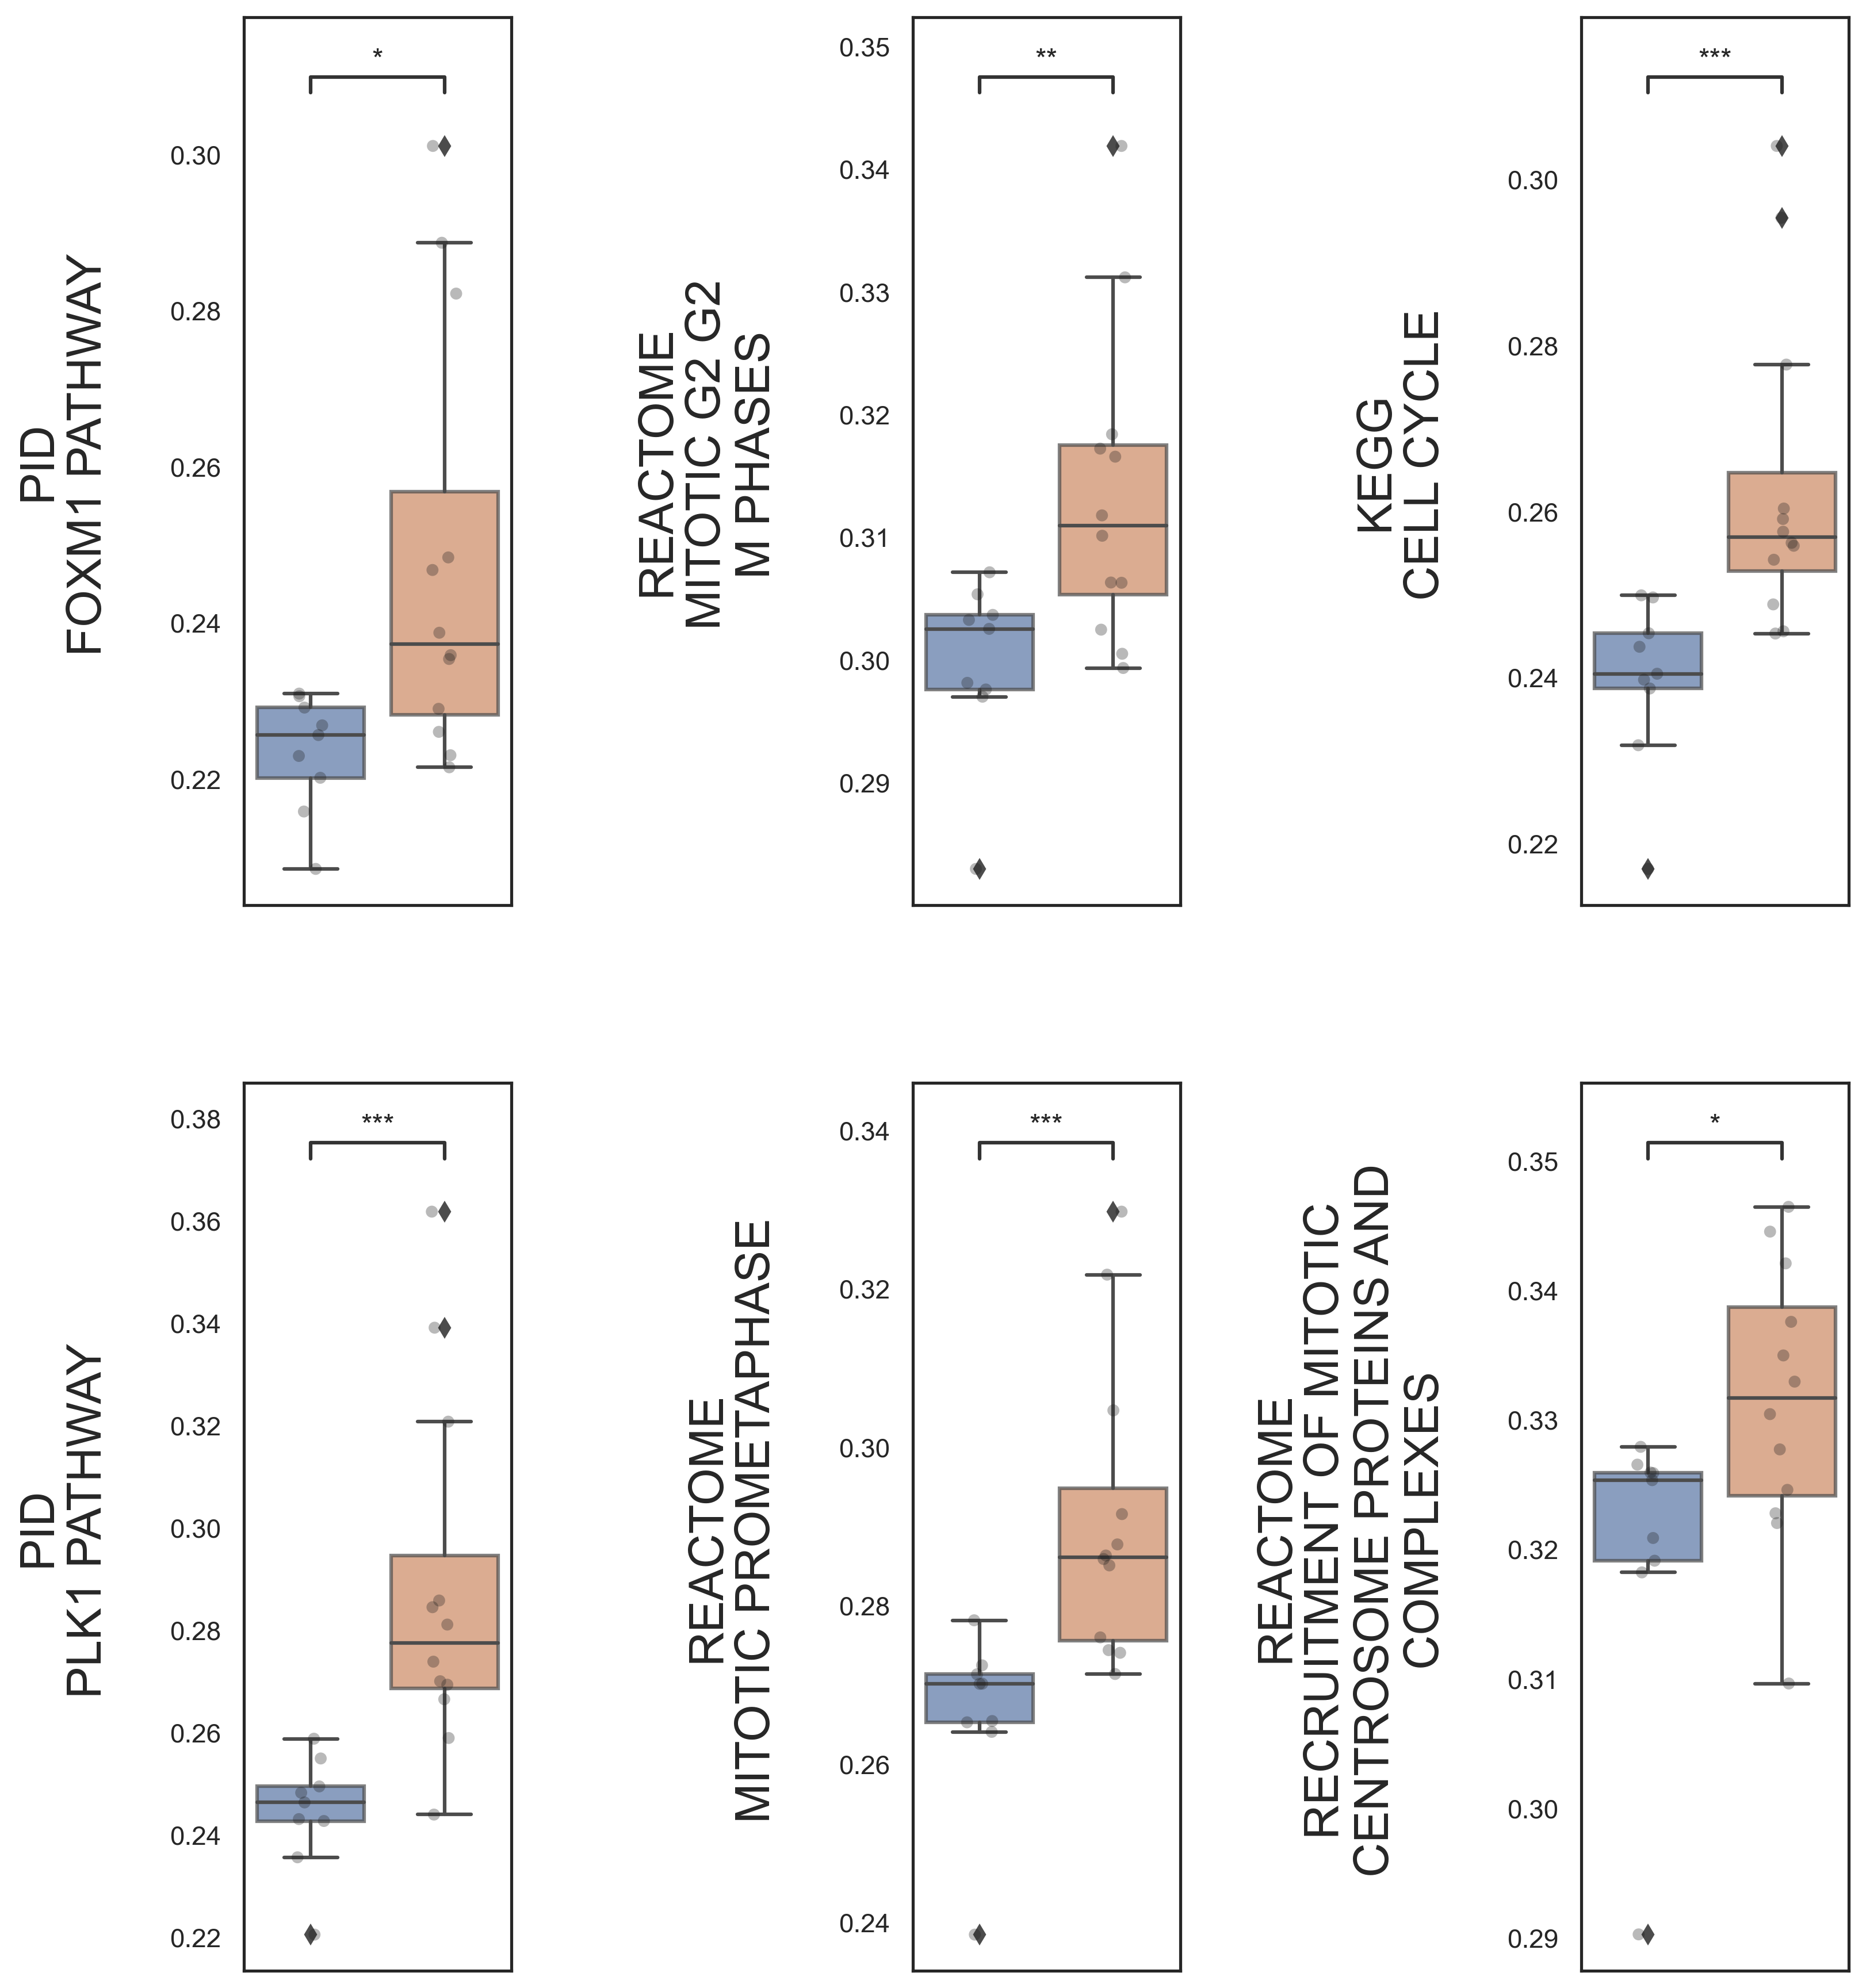

In [66]:
group_name = 'ILC Subtype'
fig,axes = plt.subplots(ncols=3, nrows=2, figsize=(12,15))


fig.subplots_adjust(hspace=.2, wspace=1.5)

for idx,name in enumerate(sig_pathways):
    
    ax = axes.flatten()[idx]
    
    mg[name] = mg[name].astype(float)
 #     sorted_cells = mg[name].median().sort_values(ascending=False).index
    sns.boxplot(data=mg, x=group_name,y=name, ax=ax, boxprops=dict(alpha=.7))
    sns.stripplot(data=mg, x=group_name,y=name, ax=ax, alpha=.3, size=5, jitter=True, color='k')
    ax.set_xlabel(''); ax.set_ylabel('')
    
    title = join_with_linebreaks(name.split('_'))
    ax.set_ylabel(title, fontsize=20)

    ax.set_xticklabels('')#(ax.get_xticklabels(), rotation = 90)

    
    pairs = [('Non-proliferative', 'Proliferative')]
    
    hue_plot_params = {
    'data': mg,
    'x': group_name,
    'y': name
}
    
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction='fdr_bh')
    annotator.apply_and_annotate()

## Plot altogether

In [68]:
dat= pd.read_csv('../data/gex/tpm.csv', index_col=0)

meta = pd.read_csv('../data/classifier/2_class_pam50.csv', index_col=0)

gsva1 = pd.read_csv('../data/gsva/ILC21pt_MsigdbCanonical.ssgsea.csv', index_col=0)
gsva2 = pd.read_csv('../data/gsva/ILC21pt_MsigdbHallmark.ssgsea.csv', index_col=0)
gsva = pd.concat((gsva1,gsva2))

mg = meta[['ILC Subtype']].join(gsva.T)

mg['REACTOME_CLASS_A1_RHODOPSIN_LIKE_RECEPTORS'] = mg['REACTOME_CLASS_A_1_RHODOPSIN_LIKE_RECEPTORS']
mg['PID_CD8TCRDOWNSTREAMPATHWAY'] = mg['PID_CD8_TCR_DOWNSTREAM_PATHWAY']

mg['REACTOME_DOWNSTREAM_TCR_SIGNALING'] = mg['REACTOME_TCR_SIGNALING']
mg['PID_CD8TCRPATHWAY'] = mg['PID_CD8_TCR_PATHWAY']
mg['PID_IL12_STAT4PATHWAY'] = mg['PID_IL12_STAT4_PATHWAY']

mg['PID_FOXM1PATHWAY'] = mg['PID_FOXM1_PATHWAY']
mg['PID_P53REGULATIONPATHWAY'] = mg['PID_P53_REGULATION_PATHWAY']

mg

ILC Subtype  BIOCARTA_GRANULOCYTES_PATHWAY  \
TP17_M605  Non-proliferative                       0.105709   
TP18_M403  Non-proliferative                       0.158115   
TP17_M383      Proliferative                       0.047790   
TP18_M202  Non-proliferative                       0.121063   
TP18_M355  Non-proliferative                       0.110070   
TP17_M510      Proliferative                       0.112719   
TP17_M802      Proliferative                       0.087186   
TP17_M882      Proliferative                       0.132996   
TP18_M329      Proliferative                       0.180602   
TP17_M378      Proliferative                       0.046127   
TP17_M384      Proliferative                       0.063293   
TP17_M559  Non-proliferative                       0.156111   
TP18_M121  Non-proliferative                       0.054129   
TP18_M278  Non-proliferative                       0.134660   
TP18_M302  Non-proliferative                       0.086148   
TP18_M372      Proliferative                       0.087123   
TP18_M95       Proliferative                       0.039405   
TP18_M251      Proliferative                       0.026133   
TP17_M622      Proliferative                       0.151180   
TP17_M899      Proliferative                       0.131271   
TP17_M901  Non-proliferative                       0.144300   

           BIOCARTA_LYM_PATHWAY  BIOCARTA_BLYMPHOCYTE_PATHWAY  \
TP17_M605              0.201361                      0.229485   
TP18_M403              0.197585                      0.272626   
TP17_M383              0.121971                      0.179275   
TP18_M202              0.183995                      0.248004   
TP18_M355              0.164807                      0.226275   
TP17_M510              0.170517                      0.243943   
TP17_M802              0.128854                      0.186085   
TP17_M882              0.163143                      0.217968   
TP18_M329              0.240962                      0.282745   
TP17_M378              0.092737                      0.143876   
TP17_M384              0.114231                      0.185918   
TP17_M559              0.211007                      0.276381   
TP18_M121              0.134228                      0.112509   
TP18_M278              0.181387                      0.214802   
TP18_M302              0.152605                      0.187723   
TP18_M372              0.160406                      0.227024   
TP18_M95               0.087513                      0.095485   
TP18_M251              0.056338                      0.071125   
TP17_M622              0.202308                      0.218642   
TP17_M899              0.195815                      0.240323   
TP17_M901              0.168300                      0.249693   

           BIOCARTA_CARM_ER_PATHWAY  BIOCARTA_LAIR_PATHWAY  \
TP17_M605                  0.322296               0.223413   
TP18_M403                  0.307355               0.251981   
TP17_M383                  0.327442               0.160877   
TP18_M202                  0.329612               0.227004   
TP18_M355                  0.318447               0.188229   
TP17_M510                  0.320848               0.197047   
TP17_M802                  0.326826               0.172486   
TP17_M882                  0.331556               0.186089   
TP18_M329                  0.330337               0.268369   
TP17_M378                  0.322369               0.119263   
TP17_M384                  0.325671               0.161634   
TP17_M559                  0.330508               0.255246   
TP18_M121                  0.334313               0.186547   
TP18_M278                  0.330635               0.244351   
TP18_M302                  0.318737               0.208292   
TP18_M372                  0.316852               0.180561   
TP18_M95                   0.313844               0.107843   
TP18_M251                  0.334889               0.106226   
TP17_M622            

In [69]:
# enriched pathways in RATHER immune related subtype
genes_ir = pd.read_excel('../data/geneset/rather_ir_hr_pathways_supp8.xlsx',\
                         sheet_name='rather_ir')['name'].tolist()

pathways_sel = [x for x in genes_ir if x in mg.columns]

sig_pathways_idx = [2,12,13,18,19,24,32,33,40,41] # manual counting pathways showing significant difference from above

sig_pathways_ir = np.array(pathways_sel)[sig_pathways_idx]
print(len(sig_pathways_ir), sig_pathways_ir, '\n')

# hormone related pathways in RATHER hormone related subtype
genes_hr = pd.read_excel('../data/geneset/rather_ir_hr_pathways_supp8.xlsx',\
                         sheet_name='rather_hr')['name'].tolist()

pathways_sel = [p for p in genes_hr if p in mg.columns]
sig_pathways_idx = [0,1,2,3,4,5] # manual counting from above

sig_pathways_hr = np.array(pathways_sel)[sig_pathways_idx]
print(len(sig_pathways_hr), sig_pathways_hr)

10 ['KEGG_JAK_STAT_SIGNALING_PATHWAY' 'BIOCARTA_KERATINOCYTE_PATHWAY'
 'PID_TXA2PATHWAY'
 'REACTOME_SYNTHESIS_SECRETION_AND_DEACYLATION_OF_GHRELIN'
 'KEGG_CALCIUM_SIGNALING_PATHWAY' 'BIOCARTA_LAIR_PATHWAY'
 'REACTOME_G_ALPHA_Q_SIGNALLING_EVENTS'
 'REACTOME_INTERACTION_BETWEEN_L1_AND_ANKYRINS'
 'REACTOME_GASTRIN_CREB_SIGNALLING_PATHWAY_VIA_PKC_AND_MAPK'
 'REACTOME_ION_TRANSPORT_BY_P_TYPE_ATPASES'] 

6 ['PID_FOXM1_PATHWAY' 'REACTOME_MITOTIC_G2_G2_M_PHASES' 'KEGG_CELL_CYCLE'
 'PID_PLK1_PATHWAY' 'REACTOME_MITOTIC_PROMETAPHASE'
 'REACTOME_RECRUITMENT_OF_MITOTIC_CENTROSOME_PROTEINS_AND_COMPLEXES']


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.164e-02 U_stat=9.000e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.218e-03 U_stat=9.300e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-proliferative vs. Proliferative: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.091e-02 U_stat=8.700e+01
p-value annotation legend:
 

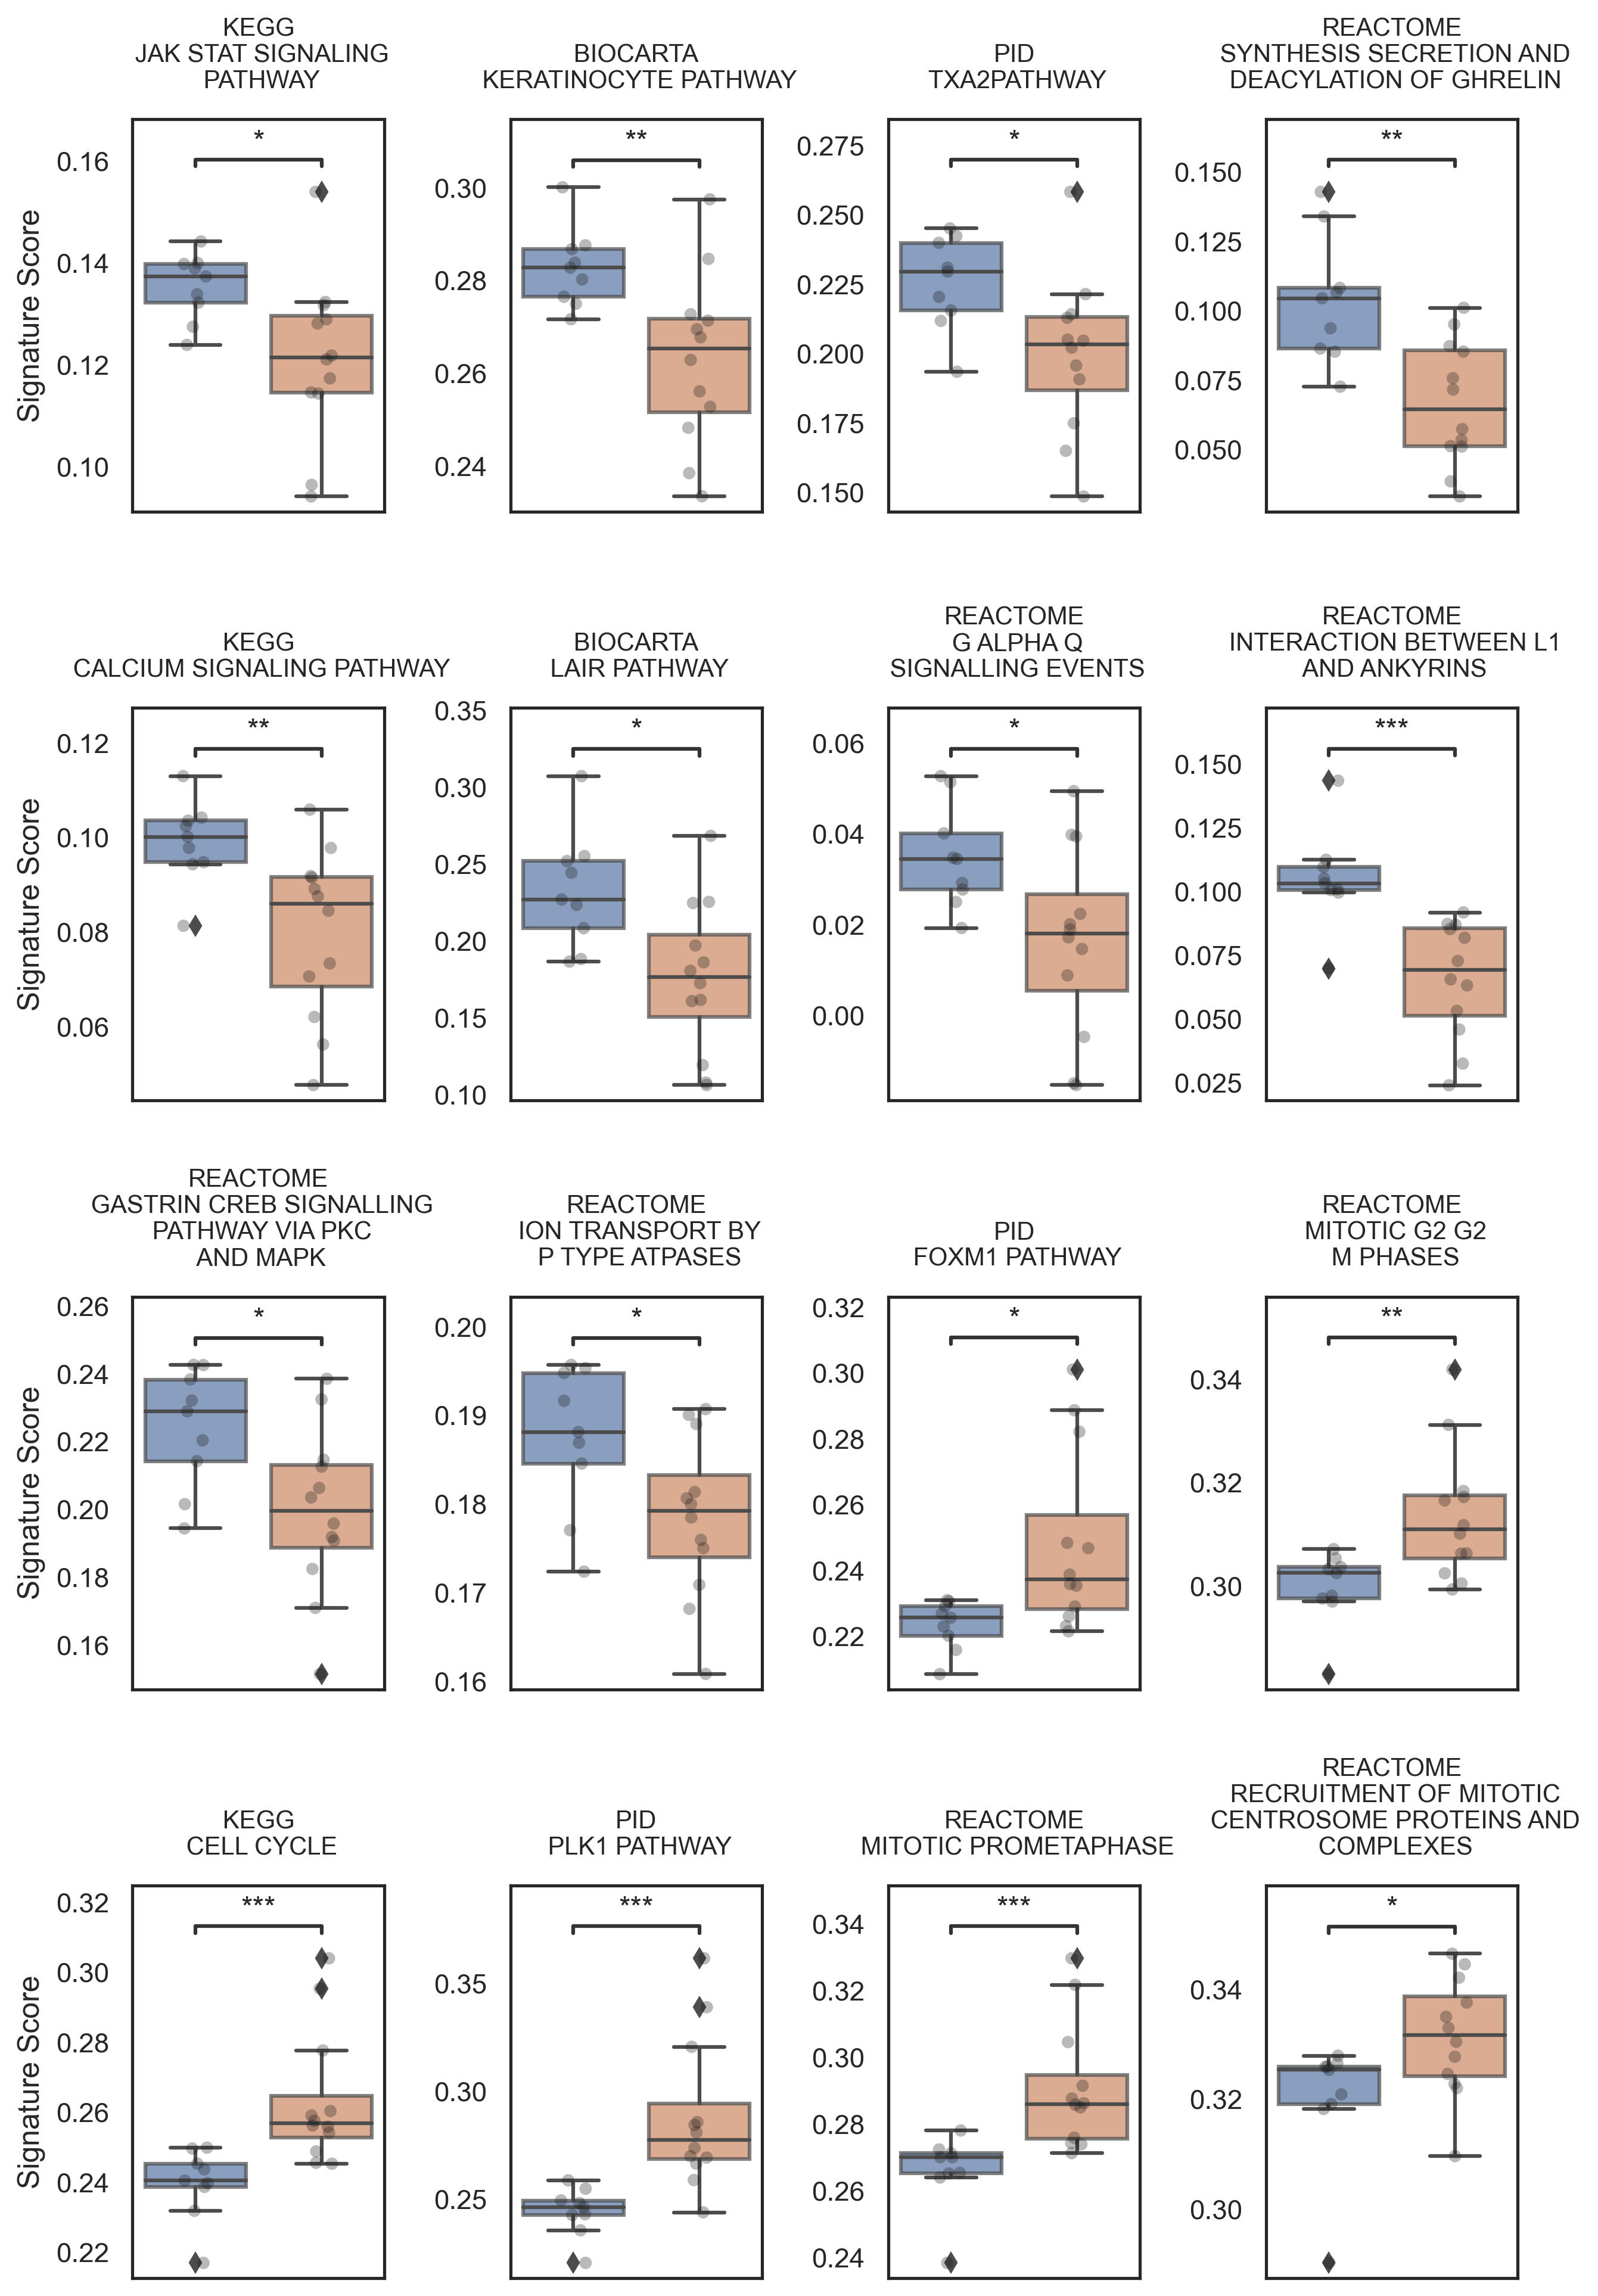

In [70]:
sns.set(style='white', font_scale=1)
plt.rcParams['figure.dpi'] = 300  # set default dpi to 300

group_name = 'ILC Subtype'
fig,axes = plt.subplots(ncols=4, nrows=4, figsize=(10,16))


fig.subplots_adjust(hspace=.5, wspace=.5)

for idx,name in enumerate(np.hstack((sig_pathways_ir, sig_pathways_hr))):
    
    ax = axes.flatten()[idx]
    
    mg[name] = mg[name].astype(float)
 #     sorted_cells = mg[name].median().sort_values(ascending=False).index
    sns.boxplot(data=mg, x=group_name,y=name, ax=ax, boxprops=dict(alpha=.7))
    sns.stripplot(data=mg, x=group_name,y=name, ax=ax, alpha=.3, size=5, jitter=True, color='k')
    ax.set_xlabel(''); ax.set_ylabel('')
    
    title = join_with_linebreaks(name.split('_'))
    ax.set_title(title, fontsize=10, pad=-20)

    ax.set_xticklabels('')#(ax.get_xticklabels(), rotation = 90)
    if idx%4 == 0:
        ax.set_ylabel('Signature Score')

    
    pairs = [('Non-proliferative', 'Proliferative')]
    
    hue_plot_params = {
    'data': mg,
    'x': group_name,
    'y': name
}
    
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction='fdr_bh')
    annotator.apply_and_annotate()

# Export